<a href="https://colab.research.google.com/github/israinamdar493-ops/retinalprojectsizz4/blob/main/finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

# Go inside your Drive project folder
%cd /content/drive/MyDrive/retinalnewproject

# (Optional) check the structure
!ls -R | head -40   # shows first 40 lines of folder tree

# Install all dependencies
!pip install torch torchvision timm albumentations pandas scikit-learn xgboost opencv-python matplotlib

# >>> RUN YOUR SCRIPT (Phase-1 demo or real data) <<<
# Replace with the actual file you want to run, for example:
!python src/phase1_demo.py


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1Rf6Yc9Cl1uiMgyOuLjskmrMAptTRTPUz/retinalnewproject
.:
aptos_efficientnetb4_model.h5
datasets
densenet121_retinal.h5
ensemble
federated
models
odir_b4_highacc
outputs
phase1_demo.py
preprocessing
reports
results
segmentation

./datasets:
APTOS
CHASEDB1
DRIVE
Messidor2
ODIR5K
RFMiD

./datasets/APTOS:
test.csv
test_images
train_1.csv
train_1.gsheet
train_images
valid.csv

./datasets/APTOS/test_images:
test_images

./datasets/APTOS/test_images/test_images:
e4dcca36ceb4.png
e50b0174690d.png
e5197d77ec68.png
e529c5757d64.png
e594c19e2e1d.png
python3: can't open file '/content/drive/.shortcut-targets-by-id/1Rf6Yc9Cl1uiMgyOuLjskmrMAptTRTPUz/retinalnewproject/src/phase1_demo.py': [Errno 2] No such file or directory


In [ ]:
# Save this cell as a .py file inside your Drive
demo_code = """
import torch, torchvision
import pandas as pd
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

print('✅ Demo running with Torch version:', torch.__version__)

# Define dataset paths - These should match the variables defined in the notebook
train_csv = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_1.csv"
train_dir = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images"
val_csv = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/valid.csv"
val_dir = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images"


class RetinalDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.df = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.df.iloc[idx, 0] + '.png')
        image = Image.open(img_name)
        label = self.df.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        return image, label

# Define a simple transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Create datasets and dataloaders
try:
    train_dataset = RetinalDataset(train_csv, train_dir, transform)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    print(f"✅ Loaded training dataset with {len(train_dataset)} images.")

    val_dataset = RetinalDataset(val_csv, val_dir, transform)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    print(f"✅ Loaded validation dataset with {len(val_dataset)} images.")

except FileNotFoundError as e:
    print(f"❌ File not found error: {e}")
    print("Please ensure the dataset paths in the script are correct.")
    exit() # Exit the script if dataset loading fails

# Fake training loop
for epoch in range(1,4):
    print(f'Epoch {epoch}: training...done!')
print('✅ Finished demo training.')
"""
with open('/content/drive/MyDrive/retinalnewproject/phase1_demo.py', 'w') as f:
    f.write(demo_code)

print("✅ File created at /content/drive/MyDrive/retinalnewproject/phase1_demo.py")

✅ File created at /content/drive/MyDrive/retinalnewproject/phase1_demo.py


In [ ]:
!python /content/drive/MyDrive/retinalnewproject/phase1_demo.py


✅ Demo running with Torch version: 2.8.0+cu126
Epoch 1: training...done!
Epoch 2: training...done!
Epoch 3: training...done!
✅ Finished demo training.


In [ ]:
!python /content/drive/MyDrive/retinalnewproject/phase1_demo.py


Traceback (most recent call last):
  File "/content/drive/MyDrive/retinalnewproject/phase1_demo.py", line 58, in <module>
    train_dataset = RetinalDataset(train_csv, train_dir, transform)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/drive/MyDrive/retinalnewproject/phase1_demo.py", line 18, in __init__
    self.df = pd.read_csv(csv_file)
              ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/io/parsers/readers.py", line 1026, in read_csv
    return _read(filepath_or_buffer, kwds)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/io/parsers/readers.py", line 620, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/io/parsers/readers.py", line 1620, in __init__
    self._engine = self._make_engine(f, self.engine)
                   ^^^^^^^^^^^

In [ ]:
import os

base_path = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS"

train_csv = os.path.join(base_path, "train_1.csv")
train_dir = os.path.join(base_path, "train_images")

val_csv = os.path.join(base_path, "valid.csv")
val_dir = os.path.join(base_path, "val_images")

In [ ]:
base_path = "/content/drive/MyDrive/retinalnewproject/datasets/ODIR5K"


In [ ]:
base_path = "/content/drive/MyDrive/retinalnewproject/datasets/RFMiD"


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_1.csv")
print(df.columns)


Index(['id_code', 'diagnosis'], dtype='object')


In [ ]:
!python /content/drive/MyDrive/retinalnewproject/phase1_demo.py

Traceback (most recent call last):
  File "/content/drive/MyDrive/retinalnewproject/phase1_demo.py", line 89, in <module>
    for images, labels in train_loader:
                          ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 734, in __next__
    data = self._next_data()
           ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 790, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "/content/drive/MyDrive/retinalnewproject/phase1_demo.py", line 47, in __getitem__
    image = Image.open(img_path).convert('RGB')
            ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages

In [ ]:
# Original
train_dir = os.path.join(base_path, "train_images")
val_dir   = os.path.join(base_path, "val_images")

# Corrected (include the extra 'test_images' folder)
train_dir = os.path.join(base_path, "train_images", "test_images")
val_dir   = os.path.join(base_path, "val_images", "val_images")  # check val_images folder similarly


In [ ]:
!ls /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/


train_images


In [ ]:
!python /content/drive/MyDrive/retinalnewproject/phase1_demo.py


Train folder: /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images
Val folder:   /content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images/val_images
Test folder:  /content/drive/MyDrive/retinalnewproject/datasets/APTOS/test_images/test_images
Traceback (most recent call last):
  File "/content/drive/MyDrive/retinalnewproject/phase1_demo.py", line 118, in <module>
    for images, labels in train_loader:
                          ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 734, in __next__
    data = self._next_data()
           ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 790, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] 

In [ ]:
# phase1_demo.py
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# -------------------------------
# 0. Dataset Paths
# -------------------------------
DATASET_NAME = "APTOS"
base_path = f"/content/drive/MyDrive/retinalnewproject/datasets/{DATASET_NAME}"

train_csv = os.path.join(base_path, "train_1.csv")
val_csv   = os.path.join(base_path, "valid.csv")
test_csv  = os.path.join(base_path, "test.csv")  # optional

# -------------------------------
# 1. Recursive folder detection
# -------------------------------
def get_image_folder(base_folder):
    """Recursively find first folder containing image files."""
    for root, dirs, files in os.walk(base_folder):
        img_files = [f for f in files if f.lower().endswith(('.png','.jpg','.jpeg'))]
        if len(img_files) > 0:
            return root
    raise ValueError(f"No image files found in {base_folder}")

train_dir = get_image_folder(os.path.join(base_path, "train_images"))
val_dir   = get_image_folder(os.path.join(base_path, "val_images"))
test_dir  = get_image_folder(os.path.join(base_path, "test_images"))

print(f"Train folder: {train_dir}")
print(f"Val folder:   {val_dir}")
print(f"Test folder:  {test_dir}")

# -------------------------------
# 2. Dataset Class
# -------------------------------
class RetinalDataset(Dataset):
    def __init__(self, csv_file, img_dir, label_col='diagnosis', transform=None):
        self.df = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        self.label_col = label_col

        self.df['id_code'] = self.df['id_code'].astype(str).str.strip()

        # Map labels to integers if not numeric
        if not np.issubdtype(self.df[self.label_col].dtype, np.integer):
            self.df[self.label_col] = pd.Categorical(self.df[self.label_col]).codes

        # Build mapping from id_code -> full image path
        self.id_to_path = {}
        for root, dirs, files in os.walk(self.img_dir):
            for f in files:
                name, ext = os.path.splitext(f)
                if name in self.df['id_code'].values and ext.lower() in ['.png','.jpg','.jpeg']:
                    self.id_to_path[name] = os.path.join(root, f)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        id_code = row['id_code']
        if id_code not in self.id_to_path:
            raise FileNotFoundError(f"Image file not found for id {id_code} in {self.img_dir}")
        img_path = self.id_to_path[id_code]

        image = Image.open(img_path).convert('RGB')
        label = torch.tensor(row[self.label_col], dtype=torch.long)
        if self.transform:
            image = self.transform(image)
        return image, label

# -------------------------------
# 3. Transformations
# -------------------------------
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# -------------------------------
# 4. Load datasets
# -------------------------------
train_dataset = RetinalDataset(train_csv, train_dir, label_col='diagnosis', transform=transform)
val_dataset   = RetinalDataset(val_csv, val_dir, label_col='diagnosis', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16, shuffle=False)

# -------------------------------
# 5. Model
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(pd.unique(train_dataset.df['diagnosis']))
model = models.efficientnet_b0(weights=None, num_classes=num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# -------------------------------
# 6. Training loop
# -------------------------------
epochs = 3  # increase for better accuracy
for epoch in range(epochs):
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {running_loss/len(train_loader):.4f}")

# -------------------------------
# 7. Validation
# -------------------------------
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

acc = accuracy_score(all_labels, all_preds)
f1  = f1_score(all_labels, all_preds, average='weighted')
print(f"Validation Accuracy: {acc:.4f} | F1 Score: {f1:.4f}")

# -------------------------------
# 8. Save model
# -------------------------------
results_path = "/content/drive/MyDrive/retinalnewproject/results"
os.makedirs(results_path, exist_ok=True)
torch.save(model.state_dict(), os.path.join(results_path, f"{DATASET_NAME}_efficientnet_phase1.pth"))
print(f"✅ Model saved to {results_path}/{DATASET_NAME}_efficientnet_phase1.pth")


Train folder: /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images
Val folder:   /content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images/val_images
Test folder:  /content/drive/MyDrive/retinalnewproject/datasets/APTOS/test_images/test_images


FileNotFoundError: Image file not found for id 916ec976ff30 in /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!python /content/drive/MyDrive/retinalnewproject/phase1_demo.py


Mounted at /content/drive
Train folder: /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images
Val folder:   /content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images/val_images
Test folder:  /content/drive/MyDrive/retinalnewproject/datasets/APTOS/test_images/test_images
Using 967 images from /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images
Using 112 images from /content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images/val_images
Epoch 1/3 | Train Loss: 1.3486
Epoch 2/3 | Train Loss: 0.7365
Epoch 3/3 | Train Loss: 0.6886
Validation Accuracy: 0.9286 | F1 Score: 0.9157
✅ Model saved to /content/drive/MyDrive/retinalnewproject/results/APTOS_efficientnet_phase1.pth


In [ ]:
# Install Gradio if not installed
!pip install gradio --quiet

import torch
from torchvision import models, transforms
from PIL import Image
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np

# -------------------
# Settings
# -------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
num_classes = 5  # change to your number of disease classes
model_path = "/content/drive/MyDrive/retinalnewproject/results/APTOS_efficientnet_phase1.pth"

# -------------------
# Image preprocessing
# -------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# -------------------
# Load model
# -------------------
model = models.efficientnet_b0(weights=None, num_classes=num_classes)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()
model.to(device)

# -------------------
# Grad-CAM function
# -------------------
def grad_cam(input_image, class_idx=None):
    # Hook for gradients
    gradients = []
    def save_gradients(module, grad_input, grad_output):
        gradients.append(grad_output[0])
    target_layer = model.features[-1]
    target_layer.register_backward_hook(save_gradients)

    # Prepare image
    input_tensor = transform(input_image).unsqueeze(0).to(device)
    input_tensor.requires_grad = True

    # Forward pass
    output = model(input_tensor)
    if class_idx is None:
        class_idx = torch.argmax(output, dim=1).item()

    # Backward pass
    model.zero_grad()
    loss = output[0, class_idx]
    loss.backward()

    grads = gradients[0].cpu().data.numpy()[0]
    fmap = target_layer(input_tensor).cpu().data.numpy()[0]

    # Grad-CAM calculation
    weights = np.mean(grads, axis=(1,2))
    cam = np.zeros(fmap.shape[1:], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * fmap[i]
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    cam = np.uint8(cam * 255)
    cam = Image.fromarray(cam).resize(input_image.size, Image.ANTIALIAS)
    return cam

# -------------------
# Prediction + Grad-CAM
# -------------------
def predict_with_gradcam(img):
    # Predict
    input_tensor = transform(img).unsqueeze(0).to(device)
    output = model(input_tensor)
    pred_idx = torch.argmax(output, dim=1).item()

    # Map class index to label (adjust this list to your dataset)
    labels = ['Normal', 'Diabetic Retinopathy', 'Glaucoma', 'Cataract', 'Other']
    pred_label = labels[pred_idx]

    # Grad-CAM overlay
    cam = grad_cam(img, class_idx=pred_idx)
    img_with_cam = Image.blend(img.convert("RGB"), cam.convert("RGB"), alpha=0.5)

    return pred_label, img_with_cam

# -------------------
# Launch Gradio app
# -------------------
interface = gr.Interface(
    fn=predict_with_gradcam,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Textbox(label="Predicted Disease"), gr.Image(label="Grad-CAM Heatmap")],
    title="Retinal Disease Detection",
    description="Upload a fundus image to get predicted disease and Grad-CAM heatmap."
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f6c32cdd5511314805.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install --upgrade gradio --quiet

import torch
from torchvision import models, transforms
from PIL import Image
import gradio as gr
import numpy as np
import os

# -------------------
# Settings
# -------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
num_classes = 5
model_path = "/content/drive/MyDrive/retinalnewproject/results/APTOS_efficientnet_phase1.pth"

# -------------------
# Preprocessing
# -------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# -------------------
# Load model
# -------------------
model = models.efficientnet_b0(weights=None, num_classes=num_classes)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()
model.to(device)

# -------------------
# Grad-CAM function
# -------------------
def grad_cam(input_image, class_idx=None):
    gradients = []

    def save_gradients(module, grad_input, grad_output):
        gradients.append(grad_output[0])

    target_layer = model.features[-1]
    target_layer.register_full_backward_hook(save_gradients)

    input_tensor = transform(input_image).unsqueeze(0).to(device)
    input_tensor.requires_grad = True
    output = model(input_tensor)
    if class_idx is None:
        class_idx = torch.argmax(output, dim=1).item()
    model.zero_grad()
    loss = output[0, class_idx]
    loss.backward()

    grads = gradients[0].cpu().data.numpy()[0]
    fmap = target_layer(input_tensor).cpu().data.numpy()[0]
    weights = np.mean(grads, axis=(1, 2))
    cam = np.zeros(fmap.shape[1:], dtype=np.float32)
    for i, w in enumerate(weights):
        cam += w * fmap[i]
    cam = np.maximum(cam, 0)
    cam = cam / (cam.max() + 1e-8)
    cam = np.uint8(cam * 255)
    cam = Image.fromarray(cam).resize(input_image.size, Image.ANTIALIAS).convert("RGB")
    return cam

# -------------------
# Prediction + Grad-CAM
# -------------------
labels = ['Normal', 'Diabetic Retinopathy', 'Glaucoma', 'Cataract', 'Other']

def predict_multiple(file_paths):
    preds = []
    cams = []
    if not isinstance(file_paths, list):
        file_paths = [file_paths]

    for f in file_paths:
        img = Image.open(f).convert("RGB")
        input_tensor = transform(img).unsqueeze(0).to(device)
        output = model(input_tensor)
        pred_idx = torch.argmax(output, dim=1).item()
        pred_label = labels[pred_idx]
        preds.append(f"{os.path.basename(f)}: {pred_label}")

        cam = grad_cam(img, class_idx=pred_idx)
        blended = Image.blend(img, cam, alpha=0.5)
        cams.append(blended)

    # Return predictions as a single string
    return "\n".join(preds), cams

# -------------------
# Gradio Interface
# -------------------
interface = gr.Interface(
    fn=predict_multiple,
    inputs=gr.File(file_types=[".png", ".jpg", ".jpeg"], file_count="multiple", label="Upload Fundus Images"),
    outputs=[gr.Textbox(label="Predicted Diseases"), gr.Gallery(label="Grad-CAM Heatmaps")],
    title="Retinal Disease Detection",
    description="Upload one or more fundus images to get predictions and Grad-CAM heatmaps."
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5799619c6f7b159e42.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import os

# Base dataset folder
dataset_base = "/content/drive/MyDrive/retinalnewproject/datasets"

# List all datasets
for dataset_name in os.listdir(dataset_base):
    dataset_path = os.path.join(dataset_base, dataset_name)
    if os.path.isdir(dataset_path):
        print(f"\nDataset: {dataset_name}")

        # List CSV files
        csv_files = [f for f in os.listdir(dataset_path) if f.endswith(".csv")]
        print("  CSV files:")
        for f in csv_files:
            print(f"    {os.path.join(dataset_path, f)}")

        # List image folders and first few images
        img_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
        print("  Image folders:")
        for f in img_folders:
            img_folder_path = os.path.join(dataset_path, f)
            imgs = os.listdir(img_folder_path)
            print(f"    {img_folder_path} ({len(imgs)} files)")
            print(f"      Sample images: {imgs[:5]}")



Dataset: DRIVE
  CSV files:
  Image folders:
    /content/drive/MyDrive/retinalnewproject/datasets/DRIVE/DRIVE (2 files)
      Sample images: ['training', 'test']

Dataset: .ipynb_checkpoints
  CSV files:
  Image folders:

Dataset: APTOS
  CSV files:
    /content/drive/MyDrive/retinalnewproject/datasets/APTOS/test.csv
    /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_1.csv
    /content/drive/MyDrive/retinalnewproject/datasets/APTOS/valid.csv
  Image folders:
    /content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images (1 files)
      Sample images: ['val_images']
    /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images (1 files)
      Sample images: ['train_images']
    /content/drive/MyDrive/retinalnewproject/datasets/APTOS/test_images (1 files)
      Sample images: ['test_images']

Dataset: CHASEDB1
  CSV files:
  Image folders:
    /content/drive/MyDrive/retinalnewproject/datasets/CHASEDB1/Images (28 files)
      Sample images: ['Image_12L.

In [ ]:
def get_actual_image_folder(base_folder):
    subfolders = [f for f in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, f))]
    if len(subfolders) == 0:
        raise ValueError(f"No subfolders found in {base_folder}")
    return os.path.join(base_folder, subfolders[0])

train_dir = get_actual_image_folder("/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images")
val_dir   = get_actual_image_folder("/content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images")
test_dir  = get_actual_image_folder("/content/drive/MyDrive/retinalnewproject/datasets/APTOS/test_images")


In [ ]:
# ===============================
# Messidor2 + ResNet50 Training
# ===============================
import os, glob
import pandas as pd
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models
from sklearn.metrics import accuracy_score, f1_score

# -------- Paths --------
base_path   = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2"
csv_file    = os.path.join(base_path, "messidor_data.csv")   # <-- ensure columns: id_code, diagnosis
img_dir     = os.path.join(base_path, "messidor-2")
results_dir = "/content/drive/MyDrive/retinalnewproject/results"
os.makedirs(results_dir, exist_ok=True)

print("CSV:", csv_file)
print("Images:", img_dir)

# -------- Dataset --------
class MessidorDataset(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):
        self.df = pd.read_csv(csv_path)
        # adapt these if different
        self.img_ids = self.df["id_code"].tolist()
        self.labels  = self.df["diagnosis"].tolist()
        self.img_dir = img_dir
        self.transform = transform

        # map available files for robust loading
        all_imgs = {os.path.splitext(os.path.basename(p))[0]: p
                    for p in glob.glob(os.path.join(img_dir, "*"))}

        self.paths = []
        for i in self.img_ids:
            p = all_imgs.get(str(i))
            if p is None:
                raise FileNotFoundError(f"Image for ID {i} not found in {img_dir}")
            self.paths.append(p)

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        image = Image.open(self.paths[idx]).convert("RGB")
        label = int(self.labels[idx])
        if self.transform: image = self.transform(image)
        return image, label

# -------- Transforms --------
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# -------- Data Split --------
full_ds = MessidorDataset(csv_file, img_dir, transform)
train_size = int(0.8 * len(full_ds))
val_size   = len(full_ds) - train_size
train_ds, val_ds = random_split(full_ds, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=16, shuffle=False, num_workers=2)

print(f"Train size: {len(train_ds)}, Val size: {len(val_ds)}")

# -------- Model --------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(set(full_ds.labels))

model = models.resnet50(weights="IMAGENET1K_V1")  # pretrained
for param in model.parameters():
    param.requires_grad = False  # freeze backbone
model.fc = nn.Linear(model.fc.in_features, num_classes)  # new head
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=1e-3)

# -------- Training --------
epochs = 3
for epoch in range(1, epochs+1):
    model.train()
    running_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*imgs.size(0)
    print(f"Epoch {epoch}/{epochs} | Train Loss: {running_loss/len(train_loader.dataset):.4f}")

# -------- Validation --------
model.eval()
preds, gts = [], []
with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        preds.extend(outputs.argmax(dim=1).cpu().numpy())
        gts.extend(labels.numpy())

acc = accuracy_score(gts, preds)
f1  = f1_score(gts, preds, average="weighted")
print(f"Validation Accuracy: {acc:.4f} | F1 Score: {f1:.4f}")

# -------- Save --------
save_path = os.path.join(results_dir, "Messidor2_resnet50_phase1.pth")
torch.save(model.state_dict(), save_path)
print(f"✅ Model saved to {save_path}")


CSV: /content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor_data.csv
Images: /content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2


FileNotFoundError: Image for ID 20051020_43808_0100_PP.png not found in /content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2

In [ ]:
import os, glob

img_dir = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2"
files = [os.path.basename(p) for p in glob.glob(os.path.join(img_dir, "*"))]

print("Total images found:", len(files))
print("Sample names:", files[:10])


Total images found: 1
Sample names: ['messidor-2']


In [ ]:
import os

root = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2"
print("Contents:", os.listdir(root))


Contents: ['messidor-2']


In [ ]:
import os
deep_path = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/messidor-2"
print("Contents:", os.listdir(deep_path))


Contents: ['preprocess']


In [ ]:
import os

deepest_path = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/messidor-2/preprocess"
print("Contents:", os.listdir(deepest_path)[:20])  # show first 20 entries


Contents: ['20060412_51775_0200_PP.png', '20060411_61979_0200_PP.png', '20060411_62142_0200_PP.png', '20060411_59549_0200_PP.png', '20060411_59812_0200_PP.png', '20060412_52425_0200_PP.png', '20060412_51746_0200_PP.png', '20060412_52371_0200_PP.png', '20060411_61060_0200_PP.png', '20060411_59747_0200_PP.png', '20060411_61402_0200_PP.png', '20060411_58413_0200_PP.png', '20060411_58494_0200_PP.png', '20060411_58993_0200_PP.png', '20060411_62036_0200_PP.png', '20060411_59176_0200_PP.png', '20060412_52020_0200_PP.png', '20060411_60426_0200_PP.png', '20060411_60028_0200_PP.png', '20060412_52351_0200_PP.png']


In [ ]:
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models
from PIL import Image
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# -------------------------
# Paths  ✅  (UPDATED)
# -------------------------
csv_file = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor_data.csv"
img_dir  = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/messidor-2/preprocess"

# -------------------------
# Dataset
# -------------------------
class MessidorDataset(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):
        self.data = pd.read_csv(csv_path)
        self.img_dir = img_dir
        self.transform = transform

        # Build a map for quick lookup
        all_imgs = {os.path.basename(x): os.path.join(root, x)
                    for root, _, files in os.walk(img_dir)
                    for x in files}

        self.paths, self.labels = [], []
        for _, row in self.data.iterrows():
            img_name = row['image']
            label = row['label']
            p = all_imgs.get(img_name)
            if p is None:
                raise FileNotFoundError(f"Image for ID {img_name} not found in {img_dir}")
            self.paths.append(p)
            self.labels.append(int(label))

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        img = Image.open(self.paths[idx]).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, self.labels[idx]

# -------------------------
# Transforms
# -------------------------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# -------------------------
# Data Split
# -------------------------
full_ds = MessidorDataset(csv_file, img_dir, transform)
train_size = int(0.8 * len(full_ds))
val_size   = len(full_ds) - train_size
train_ds, val_ds = random_split(full_ds, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=16, shuffle=False, num_workers=2)

print(f"✅ Total images: {len(full_ds)} | Train: {train_size} | Val: {val_size}")

# -------------------------
# Model
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.efficientnet_b0(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 2)  # Assuming 2 classes
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# -------------------------
# Training Loop
# -------------------------
for epoch in range(3):  # change epochs if needed
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/3] | Train Loss: {running_loss/len(train_loader):.4f}")

# -------------------------
# Validation
# -------------------------
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

acc = accuracy_score(all_labels, all_preds)
f1  = f1_score(all_labels, all_preds, average='macro')
print(f"✅ Validation Accuracy: {acc:.4f} | F1 Score: {f1:.4f}")

# Save model
os.makedirs("/content/drive/MyDrive/retinalnewproject/results", exist_ok=True)
torch.save(model.state_dict(),
           "/content/drive/MyDrive/retinalnewproject/results/Messidor2_efficientnet_phase1.pth")
print("💾 Model saved successfully!")


KeyError: 'image'

In [ ]:
import pandas as pd

csv_file = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor_data.csv"
df = pd.read_csv(csv_file)
print("Columns in CSV:", df.columns.tolist())
print(df.head())


Columns in CSV: ['id_code', 'diagnosis', 'adjudicated_dme', 'adjudicated_gradable']
                      id_code  diagnosis  adjudicated_dme  \
0  20051020_43808_0100_PP.png          0                0   
1  20051020_43832_0100_PP.png          1                0   
2  20051020_43882_0100_PP.png          1                0   
3  20051020_43906_0100_PP.png          2                1   
4  20051020_44261_0100_PP.png          0                0   

   adjudicated_gradable  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  


In [ ]:
import os
import torch
from torch.utils.data import Dataset
from PIL import Image

class MessidorDataset(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):
        self.data = pd.read_csv(csv_path)
        self.img_dir = img_dir
        self.transform = transform

        # Build a mapping of all images present in the directory for fast lookup
        all_imgs = {f: os.path.join(root, f)
                    for root, _, files in os.walk(img_dir)
                    for f in files}

        self.paths, self.labels = [], []
        for _, row in self.data.iterrows():
            img_name = row['id_code']       # already includes .png
            label    = row['diagnosis']     # use the diagnosis column
            p = all_imgs.get(img_name)
            if p is None:
                raise FileNotFoundError(f"Image {img_name} not found in {img_dir}")
            self.paths.append(p)
            self.labels.append(label)

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        img = Image.open(self.paths[idx]).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(self.labels[idx], dtype=torch.long)


In [ ]:
img_dir = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/preprocess"
csv_file = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor_data.csv"


In [ ]:
# Paste this whole cell into Colab (below the drive.mount cell)
import os, glob, time
import pandas as pd
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models
from sklearn.metrics import accuracy_score, f1_score

# ---------- SETTINGS ----------
BASE = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2"
CSV = os.path.join(BASE, "messidor_data.csv")
RESULTS_DIR = "/content/drive/MyDrive/retinalnewproject/results"
os.makedirs(RESULTS_DIR, exist_ok=True)
SEED = 42
torch.manual_seed(SEED)

# ---------- Helper: find folder that actually contains images ----------
def find_image_root(base_folder, min_images=10):
    """Walk base_folder recursively and return the first folder that has at least min_images image files."""
    exts = (".png", ".jpg", ".jpeg", ".tif", ".tiff", ".bmp")
    for root, dirs, files in os.walk(base_folder):
        imgs = [f for f in files if f.lower().endswith(exts)]
        if len(imgs) >= min_images:
            return root
    # fallback: return deepest folder with any images
    best = None
    best_count = 0
    for root, dirs, files in os.walk(base_folder):
        imgs = [f for f in files if f.lower().endswith(exts)]
        if len(imgs) > best_count:
            best_count = len(imgs); best = root
    return best

img_root = find_image_root(BASE, min_images=20)
print("Using image root:", img_root)
if img_root is None:
    raise RuntimeError(f"No image files found under {BASE} — check your dataset location.")

# ---------- Inspect CSV ----------
df = pd.read_csv(CSV)
print("CSV columns:", df.columns.tolist())
print(df.head())

# ---------- Dataset class (robust lookup by basename) ----------
class MessidorDataset(Dataset):
    def __init__(self, csv_path, img_root, img_col='id_code', label_col='diagnosis', transform=None):
        self.df = pd.read_csv(csv_path)
        self.img_root = img_root
        self.img_col = img_col
        self.label_col = label_col
        self.transform = transform

        # Build recursive mapping basename -> full path
        self.all_imgs = {}
        for p in glob.glob(os.path.join(self.img_root, "**", "*.*"), recursive=True):
            name = os.path.basename(p)
            stem = os.path.splitext(name)[0]
            # prefer the exact name key (with extension) AND also store stem key for extension-agnostic lookup
            self.all_imgs[name] = p
            self.all_imgs[stem] = p

        # Prepare final lists, and collect missing ids (if any)
        self.paths = []
        self.labels = []
        missing = []
        for _, row in self.df.iterrows():
            raw_name = str(row[self.img_col]).strip()
            # try exact match first (filename may include extension), then stem match
            if raw_name in self.all_imgs:
                p = self.all_imgs[raw_name]
            else:
                stem = os.path.splitext(raw_name)[0]
                p = self.all_imgs.get(stem)
            if p is None:
                missing.append(raw_name)
            else:
                self.paths.append(p)
                self.labels.append(int(row[self.label_col]))
        if len(missing) > 0:
            print(f"⚠️ Warning: {len(missing)} CSV image ids not found in {img_root}.")
            print(" Sample missing ids:", missing[:10])
        print(f"Dataset: found {len(self.paths)} images (skipped {len(missing)} missing)")
        if len(self.paths) == 0:
            raise RuntimeError("No images matched — check CSV 'id_code' values and image folder.")

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        img = Image.open(self.paths[idx]).convert("RGB")
        if self.transform:
            img = self.transform(img)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return img, label

# ---------- Transforms ----------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
])

# ---------- Build datasets / loaders ----------
full_ds = MessidorDataset(CSV, img_root, img_col='id_code', label_col='diagnosis', transform=transform)
train_size = int(0.8 * len(full_ds))
val_size = len(full_ds) - train_size
train_ds, val_ds = random_split(full_ds, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_ds, batch_size=16, shuffle=False, num_workers=2)

print(f"Train: {len(train_ds)}, Val: {len(val_ds)}")

# ---------- Sanity check: one batch ----------
try:
    batch_imgs, batch_labels = next(iter(train_loader))
    print("Sanity batch shapes:", batch_imgs.shape, batch_labels.shape)
except Exception as e:
    print("Sanity check failed:", e)

# ---------- Model: ResNet-50 (transfer learning) ----------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(set(full_ds.labels))
print("Num classes:", num_classes)

model = models.resnet50(pretrained=True)
# freeze backbone (optional) — comment these two lines to fine-tune everything
for param in model.parameters():
    param.requires_grad = False
# replace the classifier
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=1e-3)

# ---------- Training loop (small run) ----------
EPOCHS = 3
best_val_acc = 0.0
metrics_rows = []
for epoch in range(1, EPOCHS+1):
    t0 = time.time()
    model.train()
    total_loss = 0.0
    for imgs, labels in train_loader:
        imgs = imgs.to(device); labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * imgs.size(0)
    train_loss = total_loss / len(train_loader.dataset)

    # Validation
    model.eval()
    all_preds, all_gts = [], []
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs = imgs.to(device)
            outputs = model(imgs)
            preds = outputs.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_gts.extend(labels.numpy())
    val_acc = accuracy_score(all_gts, all_preds)
    val_f1  = f1_score(all_gts, all_preds, average='macro')
    metrics_rows.append([epoch, train_loss, val_acc, val_f1])
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_path = os.path.join(RESULTS_DIR, "Messidor2_resnet50_best.pth")
        torch.save(model.state_dict(), best_path)
    print(f"Epoch {epoch}/{EPOCHS} | train_loss={train_loss:.4f} | val_acc={val_acc:.4f} | val_f1={val_f1:.4f} | time={time.time()-t0:.1f}s")

# Save final model & metrics CSV
final_path = os.path.join(RESULTS_DIR, "Messidor2_resnet50_final.pth")
torch.save(model.state_dict(), final_path)
metrics_df = pd.DataFrame(metrics_rows, columns=["epoch","train_loss","val_acc","val_f1"])
metrics_df.to_csv(os.path.join(RESULTS_DIR, "Messidor2_metrics.csv"), index=False)
print("Saved final model:", final_path)
print("Saved metrics:", os.path.join(RESULTS_DIR, "Messidor2_metrics.csv"))


Using image root: /content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/messidor-2/preprocess
CSV columns: ['id_code', 'diagnosis', 'adjudicated_dme', 'adjudicated_gradable']
                      id_code  diagnosis  adjudicated_dme  \
0  20051020_43808_0100_PP.png          0                0   
1  20051020_43832_0100_PP.png          1                0   
2  20051020_43882_0100_PP.png          1                0   
3  20051020_43906_0100_PP.png          2                1   
4  20051020_44261_0100_PP.png          0                0   

   adjudicated_gradable  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
Dataset: found 1744 images (skipped 0 missing)
Train: 1395, Val: 349
Sanity batch shapes: torch.Size([16, 3, 224, 224]) torch.Size([16])
Num classes: 5


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 149MB/s]


Epoch 1/3 | train_loss=1.1092 | val_acc=0.5415 | val_f1=0.2442 | time=528.9s
Epoch 2/3 | train_loss=1.0351 | val_acc=0.5387 | val_f1=0.2380 | time=509.9s


In [ ]:
for param in model.parameters():
    param.requires_grad = True
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [ ]:
/content/drive/MyDrive/retinalnewproject/results/
    Messidor2_resnet50_best.pth    ← best model (from val accuracy)
    Messidor2_resnet50_final.pth   ← final model
    Messidor2_metrics.csv          ← training metrics


IndentationError: unexpected indent (ipython-input-3146123459.py, line 2)

In [ ]:
# === Fine-tune Messidor2 with ResNet50 ===
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import models

# Load the same dataset objects you already defined:
# train_loader, val_loader, MessidorDataset etc.

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained ResNet50
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

# Replace final layer (Messidor2 has 5 classes)
model.fc = nn.Linear(model.fc.in_features, 5)

# ---- UNFREEZE the backbone ----
for param in model.parameters():
    param.requires_grad = True

model = model.to(device)

# Adam optimizer with smaller LR for fine-tuning
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

EPOCHS = 10
best_acc = 0

for epoch in range(EPOCHS):
    # Training
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total
    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Train Loss: {running_loss/len(train_loader.dataset):.4f} | "
          f"Val Acc: {val_acc:.4f}")

    # Save best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(),
                   "/content/drive/MyDrive/retinalnewproject/results/Messidor2_resnet50_finetuned_best.pth")
        print("✅ Saved new best model")

print("Best validation accuracy:", best_acc)


Epoch 1/10 | Train Loss: 0.9973 | Val Acc: 0.6619
✅ Saved new best model
Epoch 2/10 | Train Loss: 0.8040 | Val Acc: 0.6734
✅ Saved new best model


KeyboardInterrupt: 

In [ ]:
# === Fine-tune Messidor2 with ResNet50 (Optimized) ===
import torch
from torch import nn, optim
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained ResNet50
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features, 5)   # Messidor2 has 5 classes
model = model.to(device)

# Unfreeze all layers
for param in model.parameters():
    param.requires_grad = True

# Optimizer + Loss
optimizer = optim.Adam(model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()

EPOCHS = 10
best_acc = 0

for epoch in range(EPOCHS):
    # Training loop
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Prevent OOM / slowdown
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    # Validation loop
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total
    train_loss = running_loss / len(train_loader.dataset)

    print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {train_loss:.4f} | Val Acc: {val_acc:.4f}")

    # Save best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(
            model.state_dict(),
            "/content/drive/MyDrive/retinalnewproject/results/Messidor2_resnet50_finetuned_best.pth"
        )
        print("✅ Saved new best model")

print("Best validation accuracy:", best_acc)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:01<00:00, 91.6MB/s]


NameError: name 'train_loader' is not defined

In [ ]:
import os
import pandas as pd
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
from PIL import Image


In [ ]:
class MessidorDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.img_dir, row['id_code'])
        image = Image.open(img_path).convert("RGB")
        label = int(row['diagnosis'])

        if self.transform:
            image = self.transform(image)
        return image, label


In [ ]:
transform_train = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

transform_val = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


In [ ]:
from sklearn.model_selection import train_test_split

csv_path = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/messidor-2/messidor_labels.csv"
img_root = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/messidor-2/preprocess"

df = pd.read_csv(csv_path)
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['diagnosis'], random_state=42)

train_csv = "/content/train_split.csv"
val_csv = "/content/val_split.csv"
train_df.to_csv(train_csv, index=False)
val_df.to_csv(val_csv, index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/messidor-2/messidor_labels.csv'

In [ ]:
from sklearn.model_selection import train_test_split

csv_path = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor_data.csv"
img_root = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/preprocess"

df = pd.read_csv(csv_path)
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['diagnosis'], random_state=42)

train_csv = "/content/train_split.csv"
val_csv = "/content/val_split.csv"
train_df.to_csv(train_csv, index=False)
val_df.to_csv(val_csv, index=False)


In [ ]:
train_dataset = MessidorDataset(train_csv, img_root, transform=transform_train)
val_dataset = MessidorDataset(val_csv, img_root, transform=transform_val)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)


In [ ]:
# === Step 6 to 9: Training ResNet50 on Messidor2 ===
import torch
from torch import nn, optim
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Load pretrained ResNet50 ---
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

# Replace final classification layer (Messidor2 has 5 classes)
model.fc = nn.Linear(model.fc.in_features, 5)
model = model.to(device)

# --- Loss & Optimizer ---
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

EPOCHS = 10
best_acc = 0

for epoch in range(EPOCHS):
    # ---- Training ----
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)

    # ---- Validation ----
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total
    train_loss = running_loss / len(train_loader.dataset)

    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Train Loss: {train_loss:.4f} | "
          f"Val Acc: {val_acc:.4f}")

    # Save best model
    if val_acc > best_acc:
        best_acc = val_acc
        save_path = "/content/drive/MyDrive/retinalnewproject/results/Messidor2_resnet50_best.pth"
        torch.save(model.state_dict(), save_path)
        print(f"✅ Saved new best model at epoch {epoch+1}")

print("🎯 Best validation accuracy:", best_acc)


FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/worker.py", line 349, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
            ~~~~~~~~~~~~^^^^^
  File "/tmp/ipython-input-1624774340.py", line 13, in __getitem__
    image = Image.open(img_path).convert("RGB")
            ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/PIL/Image.py", line 3513, in open
    fp = builtins.open(filename, "rb")
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/preprocess/IM001759.JPG'


In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=2)

print("Train batches:", len(train_loader), "Val batches:", len(val_loader))


NameError: name 'train_ds' is not defined

In [ ]:
# === Step 4 & 5: Dataset split and loaders for Messidor2 ===
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch

# Paths
csv_path = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor_data.csv"
img_root = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/preprocess"

# Load CSV
df = pd.read_csv(csv_path)

# Train/val split
train_df, val_df = train_test_split(
    df, test_size=0.2, stratify=df['diagnosis'], random_state=42
)

# Image transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Dataset class
class MessidorDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row['id_code'])
        image = Image.open(img_path).convert("RGB")
        label = int(row['diagnosis'])
        if self.transform:
            image = self.transform(image)
        return image, label

# Create datasets
train_ds = MessidorDataset(train_df, img_root, transform)
val_ds   = MessidorDataset(val_df, img_root, transform)

# Create loaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=2)

print(f"Train samples: {len(train_ds)}, Val samples: {len(val_ds)}")


Train samples: 1395, Val samples: 349


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load pretrained ResNet50
model = models.resnet50(pretrained=True)

# Change the final layer for 5 Messidor classes
num_classes = 5
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print("Model ready on:", device)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 146MB/s]


Model ready on: cuda


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [ ]:
num_epochs = 5  # you can increase later

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%")


NameError: name 'train_loader' is not defined

In [ ]:
# === Step 4 & 5: Dataset split and loaders for Messidor2 ===
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch

# Paths (Ensure these paths are correct for your setup)
csv_path = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor_data.csv"
img_root = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/preprocess"

# Load CSV
df = pd.read_csv(csv_path)

# Train/val split
# Note: Stratify requires that each class has at least one sample in both train and validation sets.
# If you have classes with very few samples, you might need to adjust the split size or handle them separately.
try:
    train_df, val_df = train_test_split(
        df, test_size=0.2, stratify=df['diagnosis'], random_state=42
    )
except ValueError as e:
    print(f"Error during train/val split: {e}")
    print("Check if your 'diagnosis' column has at least two samples for each class to enable stratification.")
    # Fallback to non-stratified split if stratification fails
    print("Attempting non-stratified split...")
    train_df, val_df = train_test_split(
        df, test_size=0.2, random_state=42
    )


# Image transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Dataset class
class MessidorDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

        # Build a mapping of all images present in the directory for fast lookup
        # This assumes image filenames in the directory exactly match 'id_code' in the CSV
        self.all_imgs = {f: os.path.join(root, f)
                         for root, _, files in os.walk(img_dir)
                         for f in files}

        self.paths, self.labels = [], []
        missing_images = []
        for _, row in self.df.iterrows():
            img_name = str(row['id_code']).strip() # Ensure it's string and strip whitespace
            label    = row['diagnosis']     # use the diagnosis column

            # Check if the image file exists in the pre-built map
            p = self.all_imgs.get(img_name)

            if p is None:
                missing_images.append(img_name)
                # Optionally skip this row or handle the missing image
                # print(f"Warning: Image {img_name} not found in {img_dir}. Skipping.")
                continue # Skip this image

            self.paths.append(p)
            self.labels.append(int(label)) # Ensure label is integer

        if missing_images:
            print(f"⚠️ Warning: {len(missing_images)} images from the dataframe were not found in the image directory.")
            print("Sample missing images:", missing_images[:10])

        if not self.paths:
             raise RuntimeError("No images loaded. Please check CSV file and image directory.")


    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        img_path = self.paths[idx]
        try:
            image = Image.open(img_path).convert("RGB")
            label = self.labels[idx] # Label is already an integer

            if self.transform:
                image = self.transform(image)
            return image, torch.tensor(label, dtype=torch.long)

        except FileNotFoundError:
            print(f"Error: Image file not found at {img_path}. This should not happen if all_imgs map is correct.")
            # Handle this error, maybe return a dummy sample or None, depending on how you want to handle it
            # For simplicity, we'll re-raise or return None. Returning None requires handling in DataLoader.
            # A common practice is to filter out missing images during dataset initialization.
            raise # Re-raise the error if it occurs unexpectedly


# Create datasets
train_ds = MessidorDataset(train_df, img_root, transform)
val_ds   = MessidorDataset(val_df, img_root, transform)

# Create loaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=2)

print(f"Train samples: {len(train_ds)}, Val samples: {len(val_ds)}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor_data.csv'

In [ ]:
# === Messidor2 Fine-tuning with ResNet50 ===
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from PIL import Image
import glob # Import glob for recursive file search

# ---------------- Paths ----------------
csv_path = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor_data.csv"
# Correcting the image root to the preprocess folder
img_root = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/messidor-2/preprocess"

# --------------- Dataset ----------------
class MessidorDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

        # Build a mapping of all images present in the directory recursively
        self.all_imgs = {}
        # Searching for common image extensions recursively
        print(f"Searching for images in: {self.img_dir}")
        found_files_count = 0
        for ext in ['*.png', '*.jpg', '*.jpeg', '*.JPG']:
             for img_path in glob.glob(os.path.join(self.img_dir, '**', ext), recursive=True):
                img_name = os.path.basename(img_path)
                self.all_imgs[img_name] = img_path
                # Also add the filename without extension for more flexible lookup
                stem, _ = os.path.splitext(img_name)
                self.all_imgs[stem] = img_path
                found_files_count += 1

        print(f"Found {found_files_count} image files in total.")
        # Print a few found files to verify
        print("Sample files found:", list(self.all_imgs.keys())[:20])


        self.paths, self.labels = [], []
        missing_images = []
        print("Matching CSV entries with found images...")
        for index, row in self.df.iterrows():
            # The id_code in Messidor2 CSV includes the extension, e.g., 'IM000001.jpg'
            img_name_in_csv = str(row['id_code']).strip()
            label    = row['diagnosis']

            # Try to match the image file using the name from the CSV (exact match first)
            p = self.all_imgs.get(img_name_in_csv)

            # If exact match fails, try matching without extension
            if p is None:
                stem_in_csv, _ = os.path.splitext(img_name_in_csv)
                p = self.all_imgs.get(stem_in_csv)


            if p is None:
                missing_images.append(img_name_in_csv)
                # print(f"Warning: Image {img_name_in_csv} not found in {self.img_dir}. Skipping.")
                continue # Skip this image

            self.paths.append(p)
            self.labels.append(int(label)) # Ensure label is integer

        if missing_images:
            print(f"⚠️ Warning: {len(missing_images)} images from the dataframe were not found in the image directory.")
            print("Sample missing images:", missing_images[:10])

        if not self.paths:
             raise RuntimeError("No images loaded. Please check CSV file and image directory, and image filenames/extensions.")

        print(f"Successfully matched {len(self.paths)} images from CSV.")


    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        img_path = self.paths[idx]
        try:
            image = Image.open(img_path).convert("RGB")
            label = self.labels[idx]

            if self.transform:
                image = self.transform(image)
            return image, torch.tensor(label, dtype=torch.long)

        except FileNotFoundError:
            # This should theoretically not happen if all_imgs map is built correctly
            print(f"Error: Image file not found at {img_path} during loading.")
            raise # Re-raise the error


# ------------- Transforms ---------------
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]) # Added normalization
])

# -------- Load CSV and split -----------
df = pd.read_csv(csv_path)
# Handle potential stratification error if needed (re-added from previous attempt)
try:
    train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['diagnosis'], random_state=42)
except ValueError as e:
    print(f"Error during stratified train/val split: {e}. Attempting non-stratified split.")
    train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)


# ---------- Dataset and DataLoader ------
train_ds = MessidorDataset(train_df, img_root, transform)
val_ds   = MessidorDataset(val_df, img_root, transform)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=16, shuffle=False, num_workers=2)

print(f"Train samples loaded: {len(train_ds)}, Val samples loaded: {len(val_ds)}")


# --------------- Device ----------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Model training device:", device)

# --------------- Model -----------------
# Using pretrained weights
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features, 5)  # 5 classes for Messidor2
model = model.to(device)

# --------- Loss & Optimizer -------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# ---------------- Training ----------------
EPOCHS = 10
best_acc = 0

print("Starting training...")
for epoch in range(EPOCHS):
    # Train
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    val_acc = correct / total

    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Train Loss: {running_loss/len(train_loader.dataset):.4f} | "
          f"Val Acc: {val_acc:.4f}")

    # Save best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(),
                   "/content/drive/MyDrive/retinalnewproject/results/Messidor2_resnet50_best.pth")
        print("✅ Saved new best model")

print("Training complete. Best validation accuracy:", best_acc)

Searching for images in: /content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/messidor-2/preprocess
Found 1744 image files in total.
Sample files found: ['20060412_51775_0200_PP.png', '20060412_51775_0200_PP', '20060411_61979_0200_PP.png', '20060411_61979_0200_PP', '20060411_62142_0200_PP.png', '20060411_62142_0200_PP', '20060411_59549_0200_PP.png', '20060411_59549_0200_PP', '20060411_59812_0200_PP.png', '20060411_59812_0200_PP', '20060412_52425_0200_PP.png', '20060412_52425_0200_PP', '20060412_51746_0200_PP.png', '20060412_51746_0200_PP', '20060412_52371_0200_PP.png', '20060412_52371_0200_PP', '20060411_61060_0200_PP.png', '20060411_61060_0200_PP', '20060411_59747_0200_PP.png', '20060411_59747_0200_PP']
Matching CSV entries with found images...
Successfully matched 1395 images from CSV.
Searching for images in: /content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/messidor-2/preprocess
Found 1744 image files in total.
Sample files found: ['20060412_5

In [ ]:
# === Messidor2 Training with EfficientNet-B3 and Augmentations ===
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from collections import Counter

# ---------------- Dataset ----------------
class MessidorDataset(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):
        self.df = pd.read_csv(csv_path)
        self.img_dir = img_dir
        self.transform = transform

        # Keep only images that exist in folder
        self.df['exists'] = self.df['id_code'].apply(lambda x: os.path.isfile(os.path.join(img_dir, x)))
        self.df = self.df[self.df['exists']]
        self.df = self.df.reset_index(drop=True)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_path = os.path.join(self.img_dir, row['id_code'])
        label = row['diagnosis']

        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, label

# ---------------- Paths ----------------
csv_path = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor_data.csv"
img_dir  = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2/messidor-2/messidor-2/preprocess"

# ---------------- Transforms ----------------
train_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])
val_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])

# ---------------- Dataset and Dataloader ----------------
full_dataset = MessidorDataset(csv_path, img_dir, transform=train_transform)
train_size = int(0.8*len(full_dataset))
val_size   = len(full_dataset) - train_size
train_ds, val_ds = torch.utils.data.random_split(full_dataset, [train_size, val_size])

# Assign validation transform
val_ds.dataset.transform = val_transform

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=16, shuffle=False, num_workers=2)

# ---------------- Weighted Loss ----------------
labels = [y for _, y in train_ds]
class_counts = Counter(labels)
class_weights = [1.0/count for count in class_counts.values()]
class_weights = torch.FloatTensor(class_weights).to('cuda')

# ---------------- Model ----------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.IMAGENET1K_V1)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 5)
model = model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=2, factor=0.5)


# ---------------- Training ----------------
EPOCHS = 15
best_acc = 0

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total
    print(f"Epoch {epoch+1}/{EPOCHS} | "
          f"Train Loss: {running_loss/len(train_loader.dataset):.4f} | "
          f"Val Acc: {val_acc:.4f}")

    # Step LR scheduler
    scheduler.step(val_acc)

    # Save best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(),
                   "/content/drive/MyDrive/retinalnewproject/results/Messidor2_efficientnetB3_best.pth")
        print("✅ Saved new best model")

print("Best validation accuracy:", best_acc)


Epoch 1/15 | Train Loss: 1.5327 | Val Acc: 0.5244
✅ Saved new best model
Epoch 2/15 | Train Loss: 1.1710 | Val Acc: 0.6103
✅ Saved new best model
Epoch 3/15 | Train Loss: 0.8751 | Val Acc: 0.6332
✅ Saved new best model
Epoch 4/15 | Train Loss: 0.6750 | Val Acc: 0.6275
Epoch 5/15 | Train Loss: 0.5292 | Val Acc: 0.6791
✅ Saved new best model
Epoch 6/15 | Train Loss: 0.3397 | Val Acc: 0.6304
Epoch 7/15 | Train Loss: 0.2844 | Val Acc: 0.6246
Epoch 8/15 | Train Loss: 0.2076 | Val Acc: 0.6562
Epoch 9/15 | Train Loss: 0.1726 | Val Acc: 0.6132
Epoch 10/15 | Train Loss: 0.1404 | Val Acc: 0.6590
Epoch 11/15 | Train Loss: 0.1286 | Val Acc: 0.6504
Epoch 12/15 | Train Loss: 0.0942 | Val Acc: 0.6562
Epoch 13/15 | Train Loss: 0.0999 | Val Acc: 0.6418


KeyboardInterrupt: 

In [ ]:
model.load_state_dict(torch.load(
    "/content/drive/MyDrive/retinalnewproject/results/Messidor2_resnet50_best.pth"))
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Convert labels to string
train_df['diagnosis'] = train_df['diagnosis'].astype(str)
val_df['diagnosis'] = val_df['diagnosis'].astype(str)


In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1️⃣ Data generators
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)

# 2️⃣ Flow from dataframe
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images",
    x_col="id_code",
    y_col="diagnosis",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',  # categorical for multi-class
    shuffle=True
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory="/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/val_images",
    x_col="id_code",
    y_col="diagnosis",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 967 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1963 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 366 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


In [39]:
import os
val_dir = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/val_images"
print("Validation files:", os.listdir(val_dir)[:10])


Validation files: ['val_images']


In [40]:
print(val_df.head())


            id_code diagnosis
0  000c1434d8d7.png         2
1  001639a390f0.png         4
2  0024cdab0c1e.png         1
3  002c21358ce6.png         0
4  005b95c28852.png         0


In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 3️⃣ Create ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 3a️⃣ Paths
train_dir = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images"
val_dir   = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/val_images"
test_dir  = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/test_images/test_images"


In [43]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)


Found 967 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1963 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


In [44]:
val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,         # your validation CSV
    directory=val_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 366 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


In [45]:
val_df['id_code'] = val_df['id_code'].str.replace('.png.png', '.png')


In [46]:
val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=val_dir,   # correct path
    x_col='id_code',
    y_col='diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 366 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


In [47]:
val_df.head()


,id_code,diagnosis
0,000c1434d8d7.png,2
1,001639a390f0.png,4
2,0024cdab0c1e.png,1
3,002c21358ce6.png,0
4,005b95c28852.png,0


In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Validation data generator
val_datagen = ImageDataGenerator(rescale=1./255)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory="/content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images",
    x_col="id_code",
    y_col="diagnosis",
    target_size=(380, 380),  # EfficientNetB4 default input
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 366 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
# Colab installs
!pip install -q timm==0.9.2 albumentations==1.3.0 efficientnet_pytorch==0.7.1

# Standard imports
import os
from pathlib import Path
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score, accuracy_score
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import timm
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 13.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

BASE = Path('/content/drive/MyDrive/retinalnewproject/datasets/APTOS')
# Common defaults — change if your filenames differ:
train_csv = BASE/'train.csv'    # change if different
image_folder = BASE/'train_images'  # where training images are stored
# where to save models/outputs
OUT = Path('/content/drive/MyDrive/retinalnewproject/outputs/efficientnet_b4_aptos')
OUT.mkdir(parents=True, exist_ok=True)

print("Paths set:")
print("BASE:", BASE)
print("train_csv:", train_csv)
print("image_folder:", image_folder)
print("OUT:", OUT)


Mounted at /content/drive
Paths set:
BASE: /content/drive/MyDrive/retinalnewproject/datasets/APTOS
train_csv: /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train.csv
image_folder: /content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images
OUT: /content/drive/MyDrive/retinalnewproject/outputs/efficientnet_b4_aptos


In [ ]:
df = pd.read_csv(train_csv)
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train.csv'

In [ ]:
!ls -l /content/drive/MyDrive/retinalnewproject/datasets/APTOS


total 69
-rw------- 1 root root  6879 Sep 13 08:28 test.csv
drwx------ 2 root root  4096 Sep 13 08:31 test_images
-rw------- 1 root root 43967 Sep 13 08:29 train_1.csv
-rw------- 1 root root   180 Sep 24 15:54 train_1.gsheet
drwx------ 2 root root  4096 Sep 13 08:31 train_images
-rw------- 1 root root  5873 Sep 13 08:30 valid.csv
drwx------ 2 root root  4096 Sep 13 08:31 val_images


In [ ]:
# ================== APTOS EfficientNet-B4 Full Code ==================
!pip install -q timm==0.9.2 albumentations==1.3.0 efficientnet_pytorch==0.7.1

import os, random, numpy as np, pandas as pd
from pathlib import Path
from PIL import Image
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, cohen_kappa_score
import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import timm
import albumentations as A
from albumentations.pytorch import ToTensorV2
from tqdm import tqdm

# ---- Mount Google Drive ----
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# ---- Paths ----
BASE = Path('/content/drive/MyDrive/retinalnewproject/datasets/APTOS')

# 🔸 Change this line if your CSV has a different name (e.g. trainLabels.csv)
train_csv = BASE/'train.csv'

image_folder = BASE/'train_images'       # Folder with training images
test_folder  = BASE/'test_images'        # Folder with test images
OUT = Path('/content/drive/MyDrive/retinalnewproject/outputs/efficientnet_b4_aptos')
OUT.mkdir(parents=True, exist_ok=True)

# ---- Load CSV ----
df = pd.read_csv(train_csv)

# detect columns automatically
id_col = 'id_code' if 'id_code' in df.columns else 'image'
label_col = 'diagnosis' if 'diagnosis' in df.columns else 'label'

# Ensure file extensions (.png/.jpg)
def ensure_ext(name):
    if Path(name).suffix == '':
        for ext in ['.png', '.jpg', '.jpeg']:
            if (image_folder / f"{name}{ext}").exists():
                return f"{name}{ext}"
    return name
df[id_col] = df[id_col].astype(str).apply(ensure_ext)
df = df[[id_col, label_col]].rename(columns={id_col: 'image', label_col: 'label'})
df['label'] = df['label'].astype(int)
df['image_path'] = df['image'].apply(lambda x: str(image_folder/x))

# ---- Stratified K-Fold split ----
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
df['fold'] = -1
for fold, (_, val_idx) in enumerate(skf.split(df, df['label'])):
    df.loc[val_idx, 'fold'] = fold
train_df = df[df['fold'] != 0].reset_index(drop=True)
val_df   = df[df['fold'] == 0].reset_index(drop=True)

# ---- Dataset class ----
IMG_SIZE = 380
train_tfms = A.Compose([
    A.RandomResizedCrop(IMG_SIZE, IMG_SIZE, scale=(0.75, 1.0), p=0.6),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.2),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Normalize(), ToTensorV2()
])
val_tfms = A.Compose([A.Resize(IMG_SIZE, IMG_SIZE), A.Normalize(), ToTensorV2()])

class AptosDataset(Dataset):
    def __init__(self, df, transforms=None):
        self.df = df.reset_index(drop=True)
        self.transforms = transforms
    def __len__(self): return len(self.df)
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img = np.array(Image.open(row['image_path']).convert('RGB'))
        if self.transforms:
            img = self.transforms(image=img)['image']
        return img, int(row['label'])

# ---- DataLoaders ----
BATCH = 8
train_loader = DataLoader(AptosDataset(train_df, train_tfms), batch_size=BATCH, shuffle=True, num_workers=2)
val_loader   = DataLoader(AptosDataset(val_df, val_tfms), batch_size=BATCH, shuffle=False, num_workers=2)

# ---- Model ----
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_classes = df['label'].nunique()

model = timm.create_model('efficientnet_b4', pretrained=True)
in_features = model.classifier.in_features
model.classifier = nn.Linear(in_features, num_classes)
model = model.to(device)

# ---- Loss & Optimizer ----
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

# ---- Training functions ----
def train_one_epoch(model, loader):
    model.train()
    total, correct, loss_sum = 0, 0, 0
    for imgs, labels in tqdm(loader, desc="Train", leave=False):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        out = model(imgs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
        preds = out.argmax(1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()
        loss_sum += loss.item() * labels.size(0)
    return loss_sum/total, correct/total

def validate(model, loader):
    model.eval()
    total, correct, loss_sum = 0, 0, 0
    preds_all, labels_all = [], []
    with torch.no_grad():
        for imgs, labels in tqdm(loader, desc="Val", leave=False):
            imgs, labels = imgs.to(device), labels.to(device)
            out = model(imgs)
            loss = criterion(out, labels)
            preds = out.argmax(1)
            preds_all += preds.cpu().tolist()
            labels_all += labels.cpu().tolist()
            total += labels.size(0)
            correct += (preds == labels).sum().item()
            loss_sum += loss.item() * labels.size(0)
    acc = correct/total
    kappa = cohen_kappa_score(labels_all, preds_all, weights='quadratic')
    return loss_sum/total, acc, kappa

# ---- Train Loop ----
best_kappa = -1
EPOCHS = 8
for e in range(1, EPOCHS+1):
    print(f"\nEpoch {e}/{EPOCHS}")
    tr_loss, tr_acc = train_one_epoch(model, train_loader)
    val_loss, val_acc, val_kappa = validate(model, val_loader)
    print(f"Train Loss {tr_loss:.4f} | Acc {tr_acc:.4f}")
    print(f"Val   Loss {val_loss:.4f} | Acc {val_acc:.4f} | Kappa {val_kappa:.4f}")
    if val_kappa > best_kappa:
        best_kappa = val_kappa
        torch.save(model.state_dict(), OUT/'best_efficientnet_b4.pth')
        print("✅ Saved Best Model")
    scheduler.step()

# ---- Inference on test set ----
test_images = sorted([p.name for p in test_folder.iterdir() if p.suffix.lower() in ['.png', '.jpg', '.jpeg']])
test_df = pd.DataFrame({'image': test_images})
test_df['image_path'] = test_df['image'].apply(lambda x: str(test_folder/x))
test_loader = DataLoader(AptosDataset(test_df, val_tfms), batch_size=BATCH, shuffle=False)

model.load_state_dict(torch.load(OUT/'best_efficientnet_b4.pth', map_location=device))
model.eval()

preds = []
with torch.no_grad():
    for imgs, _ in tqdm(test_loader, desc="Test"):
        imgs = imgs.to(device)
        out = model(imgs)
        preds += out.argmax(1).cpu().tolist()

test_df['diagnosis'] = preds
test_df[['image', 'diagnosis']].to_csv(OUT/'submission.csv', index=False)
print("\n✅ Training complete! Submission saved to:", OUT/'submission.csv')
# ================================================================


Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train.csv'

In [ ]:
!ls -l /content/drive/MyDrive/retinalnewproject/datasets/APTOS


total 69
-rw------- 1 root root  6879 Sep 13 08:28 test.csv
drwx------ 2 root root  4096 Sep 13 08:31 test_images
-rw------- 1 root root 43967 Sep 13 08:29 train_1.csv
-rw------- 1 root root   180 Sep 24 15:54 train_1.gsheet
drwx------ 2 root root  4096 Sep 13 08:31 train_images
-rw------- 1 root root  5873 Sep 13 08:30 valid.csv
drwx------ 2 root root  4096 Sep 13 08:31 val_images


In [ ]:
# =========================================================
# STEP 1: Mount Drive
# =========================================================
from google.colab import drive
drive.mount('/content/drive')

# =========================================================
# STEP 2: Import Libraries
# =========================================================
import pandas as pd
import numpy as np
import os
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# =========================================================
# STEP 3: Set Paths
# =========================================================
BASE = Path("/content/drive/MyDrive/retinalnewproject/datasets/APTOS")
train_csv = BASE / "train_1.csv"   # ✅ correct filename
val_csv   = BASE / "valid.csv"
train_dir = BASE / "train_images"
val_dir   = BASE / "val_images"

# =========================================================
# STEP 4: Load Data
# =========================================================
df_train = pd.read_csv(train_csv)
df_val   = pd.read_csv(val_csv)

print("Train shape:", df_train.shape)
print("Val shape:", df_val.shape)
print(df_train.head())

# rename columns if needed
df_train.columns = ['id_code', 'diagnosis']
df_val.columns = ['id_code', 'diagnosis']

df_train['id_code'] = df_train['id_code'].astype(str) + ".png"
df_val['id_code']   = df_val['id_code'].astype(str) + ".png"

# =========================================================
# STEP 5: Image Data Generators
# =========================================================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.15,
    validation_split=0.0
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=str(train_dir),
    x_col="id_code",
    y_col="diagnosis",
    target_size=(380, 380),
    batch_size=16,
    class_mode="categorical"
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=str(val_dir),
    x_col="id_code",
    y_col="diagnosis",
    target_size=(380, 380),
    batch_size=16,
    class_mode="categorical"
)

# =========================================================
# STEP 6: Build Model
# =========================================================
base_model = EfficientNetB4(weights="imagenet", include_top=False, input_shape=(380, 380, 3))
base_model.trainable = False  # freeze base layers initially

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(5, activation="softmax")  # 5 classes (change if needed)
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# =========================================================
# STEP 7: Callbacks
# =========================================================
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/retinalnewproject/odir_b4_highacc/aptos_effb4_best.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-6)

# =========================================================
# STEP 8: Train Model
# =========================================================
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[checkpoint, early_stop, reduce_lr]
)

# =========================================================
# STEP 9: Fine-Tuning (optional)
# =========================================================
base_model.trainable = True
model.compile(optimizer=optimizers.Adam(1e-5), loss="categorical_crossentropy", metrics=["accuracy"])

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[checkpoint, early_stop, reduce_lr]
)

# =========================================================
# STEP 10: Save Final Model
# =========================================================
model.save('/content/drive/MyDrive/retinalnewproject/odir_b4_highacc/aptos_effb4_final.h5')
print("✅ Training complete and model saved.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train shape: (2930, 2)
Val shape: (366, 2)
        id_code  diagnosis
0  1ae8c165fd53          2
1  1b329a127307          1
2  1b32e1d775ea          4
3  1b3647865779          0
4  1b398c0494d1          0


TypeError: If class_mode="categorical", y_col="diagnosis" column values must be type string, list or tuple.

In [ ]:
# =========================
# FULL STEP-BY-STEP SCRIPT
# =========================

# -------------------------
# STEP 0 — (Optional) Restart runtime to be safe when switching frameworks
# -------------------------
# (Skip if already in a fresh Colab runtime.)

# -------------------------
# STEP 1 — Mount Drive & inspect files
# -------------------------
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# show APTOS folder contents so you can double check file names
!ls -l /content/drive/MyDrive/retinalnewproject/datasets/APTOS

# -------------------------
# STEP 2 — Imports
# -------------------------
import os
from pathlib import Path
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# -------------------------
# STEP 3 — Paths & filenames (update if needed)
# -------------------------
BASE = Path("/content/drive/MyDrive/retinalnewproject/datasets/APTOS")
train_csv = BASE / "train_1.csv"   # your train CSV (as found earlier)
val_csv   = BASE / "valid.csv"     # validation CSV
test_csv  = BASE / "test.csv"      # test CSV (if you want to predict)
train_dir = BASE / "train_images"
val_dir   = BASE / "val_images"
test_dir  = BASE / "test_images"

OUT_MODELS = Path("/content/drive/MyDrive/retinalnewproject/outputs/efficientnet_b4_aptos")
OUT_MODELS.mkdir(parents=True, exist_ok=True)

# -------------------------
# STEP 4 — Load CSVs and quick checks
# -------------------------
df_train = pd.read_csv(train_csv)
df_val   = pd.read_csv(val_csv)
df_test  = pd.read_csv(test_csv) if test_csv.exists() else None

print("Train shape:", df_train.shape)
print("Val   shape:", df_val.shape)
print("Test  shape:", df_test.shape if df_test is not None else "No test CSV")
print("Train head:\n", df_train.head())

# -------------------------
# STEP 5 — Normalize column names / ensure filenames end with extension
# -------------------------
# Common column names expected: id_code (or image), diagnosis (or label)
# Adjust if your CSV uses other names.
if 'id_code' in df_train.columns:
    id_col = 'id_code'
elif 'image' in df_train.columns:
    id_col = 'image'
else:
    id_col = df_train.columns[0]   # fallback

if 'diagnosis' in df_train.columns:
    label_col = 'diagnosis'
elif 'label' in df_train.columns:
    label_col = 'label'
else:
    label_col = df_train.columns[1]  # fallback (assumes second column contains labels)

# add .png extension if missing (many APTOS ids are stored without extension)
def ensure_png(s):
    s = str(s)
    if Path(s).suffix == "":
        return s + ".png"
    return s

df_train[id_col] = df_train[id_col].astype(str).apply(ensure_png)
df_val[id_col]   = df_val[id_col].astype(str).apply(ensure_png)
if df_test is not None:
    # test.csv may have only id column; convert similarly
    test_id_col = 'id_code' if 'id_code' in df_test.columns else df_test.columns[0]
    df_test[test_id_col] = df_test[test_id_col].astype(str).apply(ensure_png)
    # rename to consistent column name for later
    df_test = df_test.rename(columns={test_id_col: 'id_code'})

# rename train/val columns to unified names
df_train = df_train.rename(columns={id_col: 'id_code', label_col: 'diagnosis'})[['id_code', 'diagnosis']]
df_val   = df_val.rename(columns={id_col: 'id_code', label_col: 'diagnosis'})[['id_code', 'diagnosis']]

# make label column strings (fixes flow_from_dataframe categorical requirement)
df_train['diagnosis'] = df_train['diagnosis'].astype(str)
df_val['diagnosis']   = df_val['diagnosis'].astype(str)

print("Unique train labels:", sorted(df_train['diagnosis'].unique()))
num_classes = len(df_train['diagnosis'].unique())
print("Num classes detected:", num_classes)

# -------------------------
# STEP 6 — ImageDataGenerators
# -------------------------
IMG_SIZE = 380
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.06,
    height_shift_range=0.06,
    shear_range=0.06,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=str(train_dir),
    x_col="id_code",
    y_col="diagnosis",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=str(val_dir),
    x_col="id_code",
    y_col="diagnosis",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# Save the mapping from class indices back to labels for later decoding
class_indices = train_gen.class_indices
print("class_indices:", class_indices)
# reverse mapping: idx -> label_string
idx2label = {v:k for k,v in class_indices.items()}

# -------------------------
# STEP 7 — Build EfficientNetB4 model
# -------------------------
base_model = EfficientNetB4(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False   # freeze base for initial training

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# -------------------------
# STEP 8 — Callbacks
# -------------------------
ckpt_path = str(OUT_MODELS / "aptos_effb4_best.h5")
checkpoint = ModelCheckpoint(ckpt_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6, verbose=1)

# -------------------------
# STEP 9 — Train (base)
# -------------------------
EPOCHS_BASE = 12
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_BASE,
    callbacks=[checkpoint, early_stop, reduce_lr]
)

# -------------------------
# STEP 10 — Fine-tune (unfreeze some layers)
# -------------------------
# Unfreeze last blocks for fine-tuning
base_model.trainable = True

# Optionally freeze up to a certain layer if you want a partial unfreeze:
# for layer in base_model.layers[:-50]:
#     layer.trainable = False

model.compile(optimizer=optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

EPOCHS_FINE = 8
history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_FINE,
    callbacks=[checkpoint, early_stop, reduce_lr]
)

# -------------------------
# STEP 11 — Save final model
# -------------------------
final_path = OUT_MODELS / "aptos_effb4_final.h5"
model.save(str(final_path))
print("Saved final model to:", final_path)

# -------------------------
# STEP 12 — Optional: Predict on test set and create submission
# -------------------------
if df_test is not None:
    # Build a simple generator for test images (no labels)
    test_df = df_test.copy()
    test_df['id_code'] = test_df['id_code'].astype(str)
    test_datagen = ImageDataGenerator(rescale=1./255)

    test_gen = test_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory=str(test_dir),
        x_col='id_code',
        y_col=None,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode=None,
        shuffle=False
    )

    # load best weights (if saved)
    if os.path.exists(ckpt_path):
        model.load_weights(ckpt_path)

    preds = model.predict(test_gen, verbose=1)
    pred_indices = np.argmax(preds, axis=1)
    pred_labels = [idx2label[i] for i in pred_indices]

    submission = pd.DataFrame({
        'id_code': test_df['id_code'].values,
        'diagnosis': pred_labels
    })
    submission_path = OUT_MODELS / "submission.csv"
    submission.to_csv(submission_path, index=False)
    print("Saved submission to:", submission_path)
else:
    print("No test.csv found — skipped test-time prediction.")

# -------------------------
# STEP 13 — (Optional) Plot training curves
# -------------------------
# You can plot history.history and history_fine.history if you want to inspect.


Mounted at /content/drive
total 69
-rw------- 1 root root  6879 Sep 13 08:28 test.csv
drwx------ 2 root root  4096 Sep 13 08:31 test_images
-rw------- 1 root root 43967 Sep 13 08:29 train_1.csv
-rw------- 1 root root   180 Sep 24 15:54 train_1.gsheet
drwx------ 2 root root  4096 Sep 13 08:31 train_images
-rw------- 1 root root  5873 Sep 13 08:30 valid.csv
drwx------ 2 root root  4096 Sep 13 08:31 val_images
Train shape: (2930, 2)
Val   shape: (366, 2)
Test  shape: (366, 2)
Train head:
         id_code  diagnosis
0  1ae8c165fd53          2
1  1b329a127307          1
2  1b32e1d775ea          4
3  1b3647865779          0
4  1b398c0494d1          0
Unique train labels: ['0', '1', '2', '3', '4']
Num classes detected: 5
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2930 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 366 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


class_indices: {}
71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)     │ (None, 12, 12, 1792)   │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         8,965 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,682,788 (67.45 MB)

 Trainable params: 8,965 (35.02 KB)

 Non-trainable params: 17,673,823 (67.42 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: The PyDataset has length 0

In [ ]:
# =========================
# Fixed: Full Colab script with filename autodetection
# =========================

# STEP 1 — Mount Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# STEP 2 — Imports
import os
from pathlib import Path
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# STEP 3 — Paths
BASE = Path("/content/drive/MyDrive/retinalnewproject/datasets/APTOS")
train_csv = BASE / "train_1.csv"
val_csv   = BASE / "valid.csv"
test_csv  = BASE / "test.csv"
train_dir = BASE / "train_images"
val_dir   = BASE / "val_images"
test_dir  = BASE / "test_images"

OUT_MODELS = Path("/content/drive/MyDrive/retinalnewproject/outputs/efficientnet_b4_aptos")
OUT_MODELS.mkdir(parents=True, exist_ok=True)

print("BASE:", BASE)
print("train_csv exists?", train_csv.exists(), "train_dir exists?", train_dir.exists())

# STEP 4 — Read CSVs
df_train = pd.read_csv(train_csv)
df_val   = pd.read_csv(val_csv)
df_test  = pd.read_csv(test_csv) if test_csv.exists() else None

print("Raw train sample:\n", df_train.head())

# STEP 5 — Normalize columns to id_code, diagnosis
# detect id and label columns robustly
def detect_cols(df):
    cols = list(df.columns)
    if 'id_code' in cols and 'diagnosis' in cols:
        return 'id_code','diagnosis'
    # common fallback: first column is id, second is label
    return cols[0], cols[1]

id_col_train, label_col_train = detect_cols(df_train)
id_col_val,   label_col_val   = detect_cols(df_val)

df_train = df_train.rename(columns={id_col_train: 'id_code', label_col_train: 'diagnosis'})[['id_code','diagnosis']]
df_val   = df_val.rename(columns={id_col_val: 'id_code', label_col_val: 'diagnosis'})[['id_code','diagnosis']]

if df_test is not None:
    test_id = 'id_code' if 'id_code' in df_test.columns else list(df_test.columns)[0]
    df_test = df_test.rename(columns={test_id: 'id_code'})[['id_code']]

# STEP 6 — Autodetect extensions and create validated filename column
def find_existing_filename(img_id, search_dirs):
    """Try common extensions and return filename (with extension) if found in any provided directory."""
    s = str(img_id)
    # if id already has an extension, test directly
    candidates = [s] if Path(s).suffix else [s + ext for ext in ['.png', '.jpg', '.jpeg', '.JPG', '.PNG']]
    # also try lower/upper variations
    candidates += [c.lower() for c in candidates] + [c.upper() for c in candidates]
    for d in search_dirs:
        for c in candidates:
            if (d / c).exists():
                return c
    return None

search_dirs_train = [train_dir, val_dir, test_dir]  # in case images are misplaced

# Apply detection for train
df_train['filename'] = df_train['id_code'].apply(lambda x: find_existing_filename(x, search_dirs_train))
df_val['filename']   = df_val['id_code'].apply(lambda x: find_existing_filename(x, search_dirs_train))
if df_test is not None:
    df_test['filename']  = df_test['id_code'].apply(lambda x: find_existing_filename(x, search_dirs_train))

# Remove rows with missing files and report
missing_train = df_train['filename'].isna().sum()
missing_val   = df_val['filename'].isna().sum()
missing_test  = df_test['filename'].isna().sum() if df_test is not None else 0

print(f"Missing images -> train: {missing_train}, val: {missing_val}, test: {missing_test}")

df_train = df_train.dropna(subset=['filename']).reset_index(drop=True)
df_val   = df_val.dropna(subset=['filename']).reset_index(drop=True)
if df_test is not None:
    df_test = df_test.dropna(subset=['filename']).reset_index(drop=True)

print("Validated train samples:", len(df_train), "Validated val samples:", len(df_val))

# STEP 7 — Ensure label column is string (required for class_mode='categorical')
df_train['diagnosis'] = df_train['diagnosis'].astype(str)
df_val['diagnosis']   = df_val['diagnosis'].astype(str)

# STEP 8 — Data generators using the validated 'filename' column
IMG_SIZE = 380
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.06,
    height_shift_range=0.06,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# IMPORTANT: flow_from_dataframe will append 'directory' + 'x_col'
# we set x_col='filename' which are actual filenames (with extension)
train_gen = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=str(train_dir),
    x_col="filename",
    y_col="diagnosis",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=str(val_dir),
    x_col="filename",
    y_col="diagnosis",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# Save mapping to decode later
class_indices = train_gen.class_indices
print("class_indices:", class_indices)
idx2label = {v:k for k,v in class_indices.items()}
num_classes = len(class_indices)

# STEP 9 — Build EfficientNetB4 model (Keras)
base_model = EfficientNetB4(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# STEP 10 — Callbacks
ckpt_path = str(OUT_MODELS / "aptos_effb4_best.h5")
checkpoint = ModelCheckpoint(ckpt_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6, verbose=1)

# STEP 11 — Train base
EPOCHS_BASE = 12
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_BASE,
    callbacks=[checkpoint, early_stop, reduce_lr]
)

# STEP 12 — Fine-tune (unfreeze last layers)
base_model.trainable = True
# optionally freeze earlier layers: for layer in base_model.layers[:-50]: layer.trainable = False

model.compile(optimizer=optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

EPOCHS_FINE = 8
history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_FINE,
    callbacks=[checkpoint, early_stop, reduce_lr]
)

# STEP 13 — Save final model
final_path = OUT_MODELS / "aptos_effb4_final.h5"
model.save(str(final_path))
print("Saved final model to:", final_path)

# STEP 14 — Test-time prediction (if test CSV present)
if df_test is not None and len(df_test) > 0:
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_gen = test_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=str(test_dir),
        x_col='filename',
        y_col=None,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode=None,
        shuffle=False
    )

    # load best weights if available
    if os.path.exists(ckpt_path):
        model.load_weights(ckpt_path)

    preds = model.predict(test_gen, verbose=1)
    pred_indices = np.argmax(preds, axis=1)
    pred_labels = [idx2label[i] for i in pred_indices]

    submission = pd.DataFrame({
        'id_code': df_test['id_code'].values,
        'diagnosis': pred_labels
    })
    submission_path = OUT_MODELS / "submission.csv"
    submission.to_csv(submission_path, index=False)
    print("Saved submission to:", submission_path)
else:
    print("No test set available or no validated test images — skipped test prediction.")


Mounted at /content/drive
BASE: /content/drive/MyDrive/retinalnewproject/datasets/APTOS
train_csv exists? True train_dir exists? True
Raw train sample:
         id_code  diagnosis
0  1ae8c165fd53          2
1  1b329a127307          1
2  1b32e1d775ea          4
3  1b3647865779          0
4  1b398c0494d1          0
Missing images -> train: 2930, val: 366, test: 366
Validated train samples: 0 Validated val samples: 0


KeyError: 'diagnosis'

In [ ]:
# =========================
# Robust EfficientNet-B4 training script for your APTOS folder
# Copy-paste and run as a single Colab cell
# =========================

# STEP 0: (Optional) ensure fresh runtime if you switched frameworks previously

# STEP 1: Mount Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# STEP 2: Imports
import os
from pathlib import Path
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# STEP 3: Paths — update only if your layout differs
BASE = Path("/content/drive/MyDrive/retinalnewproject/datasets/APTOS")
train_csv = BASE / "train_1.csv"
val_csv   = BASE / "valid.csv"
test_csv  = BASE / "test.csv"       # may or may not exist
train_dir = BASE / "train_images"
val_dir   = BASE / "val_images"
test_dir  = BASE / "test_images"

OUT = Path("/content/drive/MyDrive/retinalnewproject/outputs/efficientnet_b4_aptos")
OUT.mkdir(parents=True, exist_ok=True)

print("BASE folder contents:")
!ls -l "{BASE}"

# STEP 4: Read CSVs (safe)
def safe_read_csv(p):
    if not p.exists():
        print(f"WARNING: {p} not found.")
        return None
    return pd.read_csv(p)

df_train = safe_read_csv(train_csv)
df_val   = safe_read_csv(val_csv)
df_test  = safe_read_csv(test_csv)

# Minimal checks
if df_train is None or df_val is None:
    raise SystemExit("train_1.csv or valid.csv not found — stop and fix paths.")

print("\nRaw train head:")
print(df_train.head())
print("Train columns:", df_train.columns.tolist())
print("Val columns:", df_val.columns.tolist())
if df_test is not None:
    print("Test columns:", df_test.columns.tolist())

# STEP 5: Detect id and label columns robustly
def detect_id_label(df):
    cols = list(df.columns)
    # prefer common names
    id_candidates = ['id_code','image','image_id','id']
    label_candidates = ['diagnosis','label','level','target','diagnosis_code']
    id_col = next((c for c in id_candidates if c in cols), cols[0])
    # pick label as second column if no known label found
    label_col = next((c for c in label_candidates if c in cols), (cols[1] if len(cols) > 1 else None))
    return id_col, label_col

id_col_train, label_col_train = detect_id_label(df_train)
id_col_val,   label_col_val   = detect_id_label(df_val)

# rename to unified names
df_train = df_train.rename(columns={id_col_train: 'id_code', label_col_train: 'diagnosis'})[['id_code','diagnosis']]
df_val   = df_val.rename(columns={id_col_val: 'id_code', label_col_val: 'diagnosis'})[['id_code','diagnosis']]
if df_test is not None:
    test_id = next((c for c in df_test.columns if c.lower().startswith('id') or c.lower().startswith('image')), df_test.columns[0])
    df_test = df_test.rename(columns={test_id: 'id_code'})[['id_code']]

print("\nAfter renaming (first rows):")
print(df_train.head())
print(df_val.head())

# STEP 6: Function to find actual filename with extension in given directories
def find_existing_filename(img_id, search_dirs):
    s = str(img_id)
    # if has extension already, check that first
    candidates = [s] if Path(s).suffix else [s + ext for ext in ['.png', '.jpg', '.jpeg', '.PNG', '.JPG', '.JPEG']]
    # also try lower/upper
    candidates += [c.lower() for c in candidates] + [c.upper() for c in candidates]
    for d in search_dirs:
        for c in candidates:
            if (d / c).exists():
                return c
    return None

search_dirs = [train_dir, val_dir, test_dir]

# STEP 7: Create validated 'filename' columns by detecting extensions
df_train['filename'] = df_train['id_code'].apply(lambda x: find_existing_filename(x, search_dirs))
df_val['filename']   = df_val['id_code'].apply(lambda x: find_existing_filename(x, search_dirs))
if df_test is not None:
    df_test['filename'] = df_test['id_code'].apply(lambda x: find_existing_filename(x, search_dirs))

# Report missing and drop them
missing_train = df_train['filename'].isna().sum()
missing_val   = df_val['filename'].isna().sum()
missing_test  = int(df_test['filename'].isna().sum()) if df_test is not None else 0
print(f"\nMissing images -> train: {missing_train}, val: {missing_val}, test: {missing_test}")

df_train = df_train.dropna(subset=['filename']).reset_index(drop=True)
df_val   = df_val.dropna(subset=['filename']).reset_index(drop=True)
if df_test is not None:
    df_test = df_test.dropna(subset=['filename']).reset_index(drop=True)

print("Validated sizes -> train:", len(df_train), "val:", len(df_val), "test:", len(df_test) if df_test is not None else "N/A")

if len(df_train) == 0 or len(df_val) == 0:
    raise SystemExit("No validated images found in train/val — check filenames & folders.")

# STEP 8: Ensure labels are strings
df_train['diagnosis'] = df_train['diagnosis'].astype(str)
df_val['diagnosis']   = df_val['diagnosis'].astype(str)

# STEP 9: ImageDataGenerators and generators
IMG_SIZE = 380
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.06,
    height_shift_range=0.06,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=str(train_dir),
    x_col='filename',
    y_col='diagnosis',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=str(val_dir),
    x_col='filename',
    y_col='diagnosis',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

class_indices = train_gen.class_indices
print("Class indices:", class_indices)
idx2label = {v:k for k,v in class_indices.items()}
num_classes = len(class_indices)

# STEP 10: Build EfficientNetB4 model
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# STEP 11: Callbacks
ckpt_path = str(OUT / "aptos_effb4_best.h5")
checkpoint = ModelCheckpoint(ckpt_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6, verbose=1)

# STEP 12: Train base
EPOCHS_BASE = 12
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_BASE,
    callbacks=[checkpoint, early_stop, reduce_lr]
)

# STEP 13: Fine-tune (unfreeze backbone)
base_model.trainable = True
# optionally freeze earlier layers: for layer in base_model.layers[:-50]: layer.trainable=False
model.compile(optimizer=optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

EPOCHS_FINE = 8
history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_FINE,
    callbacks=[checkpoint, early_stop, reduce_lr]
)

# STEP 14: Save final model
final_path = OUT / "aptos_effb4_final.h5"
model.save(final_path)
print("Saved final model to:", final_path)

# STEP 15: Test inference & submission (if test exists)
if df_test is not None and len(df_test) > 0:
    # ensure filename col exists in df_test (we created earlier)
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_gen = test_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=str(test_dir),
        x_col='filename',
        y_col=None,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode=None,
        shuffle=False
    )
    # load best weights
    if os.path.exists(ckpt_path):
        model.load_weights(ckpt_path)
    preds = model.predict(test_gen, verbose=1)
    pred_indices = np.argmax(preds, axis=1)
    pred_labels = [idx2label[i] for i in pred_indices]
    submission = pd.DataFrame({'id_code': df_test['id_code'].values, 'diagnosis': pred_labels})
    submission_path = OUT / "submission.csv"
    submission.to_csv(submission_path, index=False)
    print("Saved submission to:", submission_path)
else:
    print("No test.csv or no validated test images — skipping test prediction.")

# Done
print("All steps finished.")


KeyboardInterrupt: 

In [ ]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# STEP 2: Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# STEP 3: Define Paths
base_dir = "/content/drive/MyDrive/retinalnewproject"
train_csv = f"{base_dir}/train_1.csv"
val_csv = f"{base_dir}/valid.csv"
train_dir = f"{base_dir}/train_images"
val_dir = f"{base_dir}/val_images"

# STEP 4: Load CSVs
df_train = pd.read_csv(train_csv)
df_val = pd.read_csv(val_csv)

# Ensure correct columns
print(df_train.head())

# Rename columns if needed
if 'diagnosis' not in df_train.columns:
    # Detect possible name mismatch
    print("Columns found:", df_train.columns)
    df_train.columns = ['id_code', 'diagnosis']
if 'diagnosis' not in df_val.columns:
    df_val.columns = ['id_code', 'diagnosis']

# Convert diagnosis to string for categorical mode
df_train['diagnosis'] = df_train['diagnosis'].astype(str)
df_val['diagnosis'] = df_val['diagnosis'].astype(str)

print("Train shape:", df_train.shape)
print("Val shape:", df_val.shape)
print("Unique labels:", df_train['diagnosis'].unique())

# STEP 5: ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=train_dir,
    x_col='id_code',
    y_col='diagnosis',
    target_size=(380, 380),
    class_mode='categorical',
    batch_size=16,
    shuffle=True
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=val_dir,
    x_col='id_code',
    y_col='diagnosis',
    target_size=(380, 380),
    class_mode='categorical',
    batch_size=16,
    shuffle=False
)

# STEP 6: Build EfficientNetB4 model
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(380, 380, 3))
base_model.trainable = False  # freeze base

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# STEP 7: Train the model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[checkpoint, early_stop]
)

# STEP 8: Save model
model.save(f"{base_dir}/efficientnet_b4_trained.h5")
print("✅ Training complete and model saved!")


Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/retinalnewproject/train_1.csv'

In [ ]:
# =========================================
# STEP 1: Mount Google Drive
# =========================================
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# =========================================
# STEP 2: Import Libraries
# =========================================
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# =========================================
# STEP 3: Define Dataset Paths
# =========================================
base_dir = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS"
train_csv = f"{base_dir}/train_1.csv"
val_csv   = f"{base_dir}/valid.csv"

# 👇 Your corrected image paths
train_dir = f"{base_dir}/train_images/train_images"
val_dir   = f"{base_dir}/train_images/val_images"

# =========================================
# STEP 4: Load CSVs
# =========================================
df_train = pd.read_csv(train_csv)
df_val = pd.read_csv(val_csv)

# Make sure column names match
df_train.columns = ['id_code', 'diagnosis']
df_val.columns = ['id_code', 'diagnosis']

# Add image extension
df_train['id_code'] = df_train['id_code'].astype(str) + '.png'
df_val['id_code'] = df_val['id_code'].astype(str) + '.png'

# Convert to string (for categorical labels)
df_train['diagnosis'] = df_train['diagnosis'].astype(str)
df_val['diagnosis'] = df_val['diagnosis'].astype(str)

print("Train shape:", df_train.shape)
print("Val shape:", df_val.shape)
print(df_train.head())

# =========================================
# STEP 5: Data Generators
# =========================================
IMG_SIZE = 380
BATCH_SIZE = 8

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=train_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=val_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# =========================================
# STEP 6: Build Model
# =========================================
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # freeze base

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# =========================================
# STEP 7: Training Setup
# =========================================
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/retinalnewproject/models/aptos_effb4_best.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# =========================================
# STEP 8: Train Model
# =========================================
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[checkpoint, reduce_lr, early_stop]
)

print("✅ Training complete!")


Mounted at /content/drive
Train shape: (2930, 2)
Val shape: (366, 2)
            id_code diagnosis
0  1ae8c165fd53.png         2
1  1b329a127307.png         1
2  1b32e1d775ea.png         4
3  1b3647865779.png         0
4  1b398c0494d1.png         0
Found 967 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1963 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 366 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)     │ (None, 12, 12, 1792)   │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         8,965 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,682,788 (67.45 MB)

 Trainable params: 8,965 (35.02 KB)

 Non-trainable params: 17,673,823 (67.42 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7627 - loss: 0.9978

ValueError: The PyDataset has length 0

In [ ]:
# =========================================
# STEP 1: Mount Google Drive
# =========================================
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# =========================================
# STEP 2: Import Libraries
# =========================================
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# =========================================
# STEP 3: Define Dataset Paths
# =========================================
base_dir = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS"

train_csv = f"{base_dir}/train_1.csv"
val_csv   = f"{base_dir}/valid.csv"

train_dir = f"{base_dir}/train_images/train_images"
val_dir   = f"{base_dir}/train_images/val_images"

# =========================================
# STEP 4: Load CSV Files
# =========================================
df_train = pd.read_csv(train_csv)
df_val = pd.read_csv(val_csv)

# Ensure column names are correct
df_train.columns = ['id_code', 'diagnosis']
df_val.columns = ['id_code', 'diagnosis']

# Add .png extension to filenames
df_train['id_code'] = df_train['id_code'].astype(str) + '.png'
df_val['id_code'] = df_val['id_code'].astype(str) + '.png'

# Convert labels to strings for categorical mode
df_train['diagnosis'] = df_train['diagnosis'].astype(str)
df_val['diagnosis'] = df_val['diagnosis'].astype(str)

print("✅ Train shape:", df_train.shape)
print("✅ Val shape:", df_val.shape)
print(df_train.head())

# =========================================
# STEP 5: Data Generators
# =========================================
IMG_SIZE = 380
BATCH_SIZE = 8

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=train_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# ✅ Fix: Use train_dir if val_dir has missing/invalid images
if len(os.listdir(val_dir)) == 0:
    print("⚠️ No validation images found, using training directory temporarily.")
    val_dir = train_dir

val_gen = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=val_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# =========================================
# STEP 6: Build Model
# =========================================
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# =========================================
# STEP 7: Callbacks
# =========================================
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/retinalnewproject/models/aptos_effb4_best.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# =========================================
# STEP 8: Train Model
# =========================================
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[checkpoint, reduce_lr, early_stop]
)

print("✅ Training completed successfully!")


Mounted at /content/drive
✅ Train shape: (2930, 2)
✅ Val shape: (366, 2)
            id_code diagnosis
0  1ae8c165fd53.png         2
1  1b329a127307.png         1
2  1b32e1d775ea.png         4
3  1b3647865779.png         0
4  1b398c0494d1.png         0
Found 967 validated image filenames belonging to 5 classes.
Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1963 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 366 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)     │ (None, 12, 12, 1792)   │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         8,965 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,682,788 (67.45 MB)

 Trainable params: 8,965 (35.02 KB)

 Non-trainable params: 17,673,823 (67.42 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 737ms/step - accuracy: 0.8206 - loss: 0.9498

ValueError: The PyDataset has length 0

In [51]:
import os

train_dir = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images"
val_dir = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/val_images"

print("Train Images:", len(os.listdir(train_dir)))
print("Val Images:", len(os.listdir(val_dir)))


Train Images: 967
Val Images: 1


In [52]:
# --- FIXED: Use 10% of training data as validation ---

from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
train_csv = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_1.csv"
train_dir = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images"

# Load data
df_train = pd.read_csv(train_csv)
df_train['id_code'] = df_train['id_code'].astype(str) + ".png"
df_train['diagnosis'] = df_train['diagnosis'].astype(str)

# Split 90/10 for train/validation
df_train_new, df_val_new = train_test_split(
    df_train,
    test_size=0.1,
    random_state=42,
    stratify=df_train['diagnosis']
)

# Data generators
IMG_SIZE = 380
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_gen = train_datagen.flow_from_dataframe(
    dataframe=df_train_new,
    directory=train_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=df_val_new,
    directory=train_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 864 validated image filenames belonging to 5 classes.
Found 103 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1773 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 190 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


In [54]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9215 - loss: 0.2546

ValueError: Input 0 of layer "functional" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 380, 380, 3)

In [55]:
# Correct image size for your model
IMG_SIZE = 224  # set to 224 for EfficientNetB0 / B4 model if your model was trained with 224

# Update the generators
train_gen = train_datagen.flow_from_dataframe(
    dataframe=df_train_new,
    directory=train_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=df_val_new,
    directory=train_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 864 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1773 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


Found 103 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 190 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


In [56]:
# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8923 - loss: 0.3299 - val_accuracy: 0.8447 - val_loss: 0.5694
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 928ms/step - accuracy: 0.9288 - loss: 0.2083 - val_accuracy: 0.8447 - val_loss: 0.5418
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 913ms/step - accuracy: 0.9397 - loss: 0.1980 - val_accuracy: 0.8447 - val_loss: 0.5512
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 930ms/step - accuracy: 0.9447 - loss: 0.1697 - val_accuracy: 0.8544 - val_loss: 0.5206
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 931ms/step - accuracy: 0.9349 - loss: 0.1792 - val_accuracy: 0.8447 - val_loss: 0.6061
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 918ms/step - accuracy: 0.9596 - loss: 0.1319 - val_accuracy: 0.8447 - val_loss: 0.5646
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 945ms/step - accuracy: 0.9731 - loss: 0.1002 - val_accuracy: 0.8350 - val_loss: 0.7260
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 54s 994ms/step - accuracy: 0.9568 - loss: 0.1127 - val_accura

In [57]:
from sklearn.metrics import classification_report
import numpy as np

# Reset validation generator
val_gen.reset()

# Get true labels
y_true = val_gen.classes

# Predict probabilities
y_pred = model.predict(val_gen, verbose=1)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
report = classification_report(y_true, y_pred_classes)
print(report)


7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step
              precision    recall  f1-score   support

           0       0.84      0.98      0.90        87
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2

    accuracy                           0.83       103
   macro avg       0.17      0.20      0.18       103
weighted avg       0.71      0.83      0.76       103



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
from sklearn.utils import class_weight
import numpy as np

# Compute class weights
classes = np.unique(df_train_new['diagnosis'])
y_train = df_train_new['diagnosis'].astype(int)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)
class_weights = dict(zip(classes, class_weights))
print("Class weights:", class_weights)

# Retrain model with class weights
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    class_weight=class_weights
)


ValueError: classes should include all valid labels that can be in y

In [59]:
from sklearn.utils import class_weight
import numpy as np

# Ensure labels are integers
y_train = df_train_new['diagnosis'].astype(int)

# Get all classes present in training data
classes = np.unique(y_train)

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)
class_weights = dict(zip(classes, class_weights))
print("Class weights:", class_weights)


Class weights: {np.int64(0): np.float64(0.4088372093023256), np.int64(1): np.float64(1.9533333333333334), np.int64(2): np.float64(0.7254470426409904), np.int64(3): np.float64(3.794244604316547), np.int64(4): np.float64(2.499526066350711)}


In [60]:
# Retrain model with class weights
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,  # or more
    class_weight=class_weights
)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 164s 984ms/step - accuracy: 0.9746 - loss: 0.1337 - val_accuracy: 0.8738 - val_loss: 0.6295
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 52s 950ms/step - accuracy: 0.9820 - loss: 0.0917 - val_accuracy: 0.8641 - val_loss: 0.5350
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 938ms/step - accuracy: 0.9655 - loss: 0.0918 - val_accuracy: 0.8252 - val_loss: 0.6604
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 940ms/step - accuracy: 0.9751 - loss: 0.0931 - val_accuracy: 0.2816 - val_loss: 1.2789
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 915ms/step - accuracy: 0.9675 - loss: 0.1675 - val_accuracy: 0.8641 - val_loss: 0.5249
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 935ms/step - accuracy: 0.9949 - loss: 0.0279 - val_accuracy: 0.8544 - val_loss: 0.6956
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 922ms/step - accuracy: 0.9959 - loss: 0.0437 - val_accuracy: 0.8252 - val_loss: 0.6974
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 948ms/step - accuracy: 0.9825 - loss: 0.0569 - val_acc

In [61]:
import numpy as np

# Normalize class weights
max_weight = max(class_weights.values())
class_weights_norm = {k: v/max_weight for k, v in class_weights.items()}
print(class_weights_norm)


{np.int64(0): np.float64(0.10775193798449612), np.int64(1): np.float64(0.5148148148148148), np.int64(2): np.float64(0.19119669876203574), np.int64(3): np.float64(1.0), np.int64(4): np.float64(0.6587677725118484)}


In [62]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    class_weight=class_weights_norm
)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 54s 982ms/step - accuracy: 0.9901 - loss: 0.0065 - val_accuracy: 0.8544 - val_loss: 0.7125
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9871 - loss: 0.0072 - val_accuracy: 0.8544 - val_loss: 0.6129
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 945ms/step - accuracy: 0.9893 - loss: 0.0080 - val_accuracy: 0.9126 - val_loss: 0.3699
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 912ms/step - accuracy: 0.9958 - loss: 0.0088 - val_accuracy: 0.9320 - val_loss: 0.3978
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 934ms/step - accuracy: 0.9972 - loss: 0.0033 - val_accuracy: 0.9126 - val_loss: 0.4106
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 932ms/step - accuracy: 0.9938 - loss: 0.0090 - val_accuracy: 0.9126 - val_loss: 0.3397
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 905ms/step - accuracy: 0.9902 - loss: 0.0090 - val_accuracy: 0.9126 - val_loss: 0.3324
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 927ms/step - accuracy: 0.9946 - loss: 0.0058 - val_accurac

In [63]:
import numpy as np
from sklearn.metrics import classification_report

# Reset the validation generator
val_gen.reset()

# True labels
y_true = val_gen.classes

# Predict probabilities
y_pred = model.predict(val_gen, verbose=1)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


In [64]:
# Classification report
report = classification_report(y_true, y_pred_classes, zero_division=0)
print(report)


              precision    recall  f1-score   support

           0       0.82      0.86      0.84        87
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2

    accuracy                           0.73       103
   macro avg       0.16      0.17      0.17       103
weighted avg       0.70      0.73      0.71       103



In [65]:
from sklearn.utils import class_weight
import numpy as np

# Get the training labels as integers
y_train = df_train_new['diagnosis'].astype(int)

# Get unique classes
classes = np.unique(y_train)

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)

# Convert to dictionary
class_weights_dict = dict(zip(classes, class_weights))
print("Class weights:", class_weights_dict)


Class weights: {np.int64(0): np.float64(0.4088372093023256), np.int64(1): np.float64(1.9533333333333334), np.int64(2): np.float64(0.7254470426409904), np.int64(3): np.float64(3.794244604316547), np.int64(4): np.float64(2.499526066350711)}


In [66]:
# Retrain the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    class_weight=class_weights_dict
)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9916 - loss: 0.0279 - val_accuracy: 0.8835 - val_loss: 0.5570
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 942ms/step - accuracy: 0.9873 - loss: 0.0313 - val_accuracy: 0.8155 - val_loss: 0.5843
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 942ms/step - accuracy: 0.9945 - loss: 0.0300 - val_accuracy: 0.8447 - val_loss: 0.5261
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 52s 961ms/step - accuracy: 0.9889 - loss: 0.0385 - val_accuracy: 0.7476 - val_loss: 0.6877
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 48s 889ms/step - accuracy: 0.9880 - loss: 0.0298 - val_accuracy: 0.9126 - val_loss: 0.3149
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 903ms/step - accuracy: 0.9877 - loss: 0.0295 - val_accuracy: 0.8835 - val_loss: 0.5242
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 906ms/step - accuracy: 0.9885 - loss: 0.0375 - val_accuracy: 0.8544 - val_loss: 0.7468
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 943ms/step - accuracy: 0.9991 - loss: 0.0072 - val_accurac

In [67]:
import numpy as np
from sklearn.metrics import classification_report

# Reset the generator before prediction
val_gen.reset()

# Predict probabilities
y_pred = model.predict(val_gen, verbose=1)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = val_gen.classes

# Classification report
report = classification_report(y_true, y_pred_classes, zero_division=0)
print(report)


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 843ms/step
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        87
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2

    accuracy                           0.79       103
   macro avg       0.17      0.19      0.18       103
weighted avg       0.72      0.79      0.75       103



In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Paths
train_csv = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_1.csv"
train_dir = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images"

# Load CSV
df = pd.read_csv(train_csv)
df['id_code'] = df['id_code'].astype(str) + ".png"
df['diagnosis'] = df['diagnosis'].astype(str)

# Split 90% train, 10% validation
df_train, df_val = train_test_split(df, test_size=0.1, random_state=42, stratify=df['diagnosis'])

# Image parameters
IMG_SIZE = 380
BATCH_SIZE = 16

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Training generator
train_gen = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=train_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

# Validation generator
val_gen = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=train_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 864 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1773 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


Found 103 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 190 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


In [83]:
# Step 1: Define model summary
model_name = "EfficientNetB0"  # replace with your version
val_accuracy = 0.8544          # final validation accuracy
val_f1_score = 0.18            # macro avg F1 from classification report
notes = "High training accuracy but overfitting; class imbalance affects predictions"

# Step 2: Print summary like DenseNet table
print(f"Model: {model_name}")
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
print(f"Validation F1-score: {val_f1_score*100:.2f}%")
print(f"Notes: {notes}")


Model: EfficientNetB0
Validation Accuracy: 85.44%
Validation F1-score: 18.00%
Notes: High training accuracy but overfitting; class imbalance affects predictions


In [85]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import os

# Paths
train_dir = '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images'
val_dir = '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images'
result_dir = '/content/drive/MyDrive/retinalnewproject/result'

os.makedirs(result_dir, exist_ok=True)


In [86]:
# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Validation data generator (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_dataset = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1079 images belonging to 2 classes.


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images'

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2  # 20% for validation
)

train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # use 80% for training
)

val_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset='validation'  # use 20% for validation
)


Found 864 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [88]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load EfficientNetB0 base model without top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(2, activation='softmax')(x)  # 2 classes

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model for initial training
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.7654 - loss: 0.4665 - val_accuracy: 0.8977 - val_loss: 0.3921
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8955 - loss: 0.3643 - val_accuracy: 0.8977 - val_loss: 0.3462
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.9113 - loss: 0.3120 - val_accuracy: 0.8977 - val_loss: 0.3303
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8993 - loss: 0.3330 - val_accuracy: 0.8977 - val_loss: 0.3308
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8966 - loss: 0.3324 - val_accuracy: 0.8977 - val_loss: 0.3426
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8890 - loss: 0.3582 - val_accuracy: 0.8977 - val_loss: 0.3302
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8901 - loss: 0.3525 - val_accuracy: 0.8977 - val_loss: 0.3380
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.88

In [89]:
from sklearn.metrics import classification_report
import numpy as np

# Predict on validation dataset
val_dataset.reset()  # Ensure predictions start from beginning
y_pred_probs = model.predict(val_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_dataset.classes

# Print classification report
report = classification_report(y_true, y_pred, target_names=list(val_dataset.class_indices.keys()))
print(report)


7/7 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step
              precision    recall  f1-score   support

train_images       0.90      1.00      0.95       193
  val_images       0.00      0.00      0.00        22

    accuracy                           0.90       215
   macro avg       0.45      0.50      0.47       215
weighted avg       0.81      0.90      0.85       215



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [90]:
import json
import os

# Folder to save results
result_dir = '/content/drive/MyDrive/retinalnewproject/result'
os.makedirs(result_dir, exist_ok=True)

# Save model
model.save(os.path.join(result_dir, 'EfficientNetB0.h5'))

# Prepare summary
summary = {
    "Model": "EfficientNetB0",
    "Validation Accuracy": round(np.mean(val_dataset.classes == np.argmax(y_pred_probs, axis=1))*100, 2),
    "Validation F1-score": round(float(np.mean([float(x.split()[-1]) for x in report.splitlines()[2:3]]))*100, 2),
    "Notes": "High training accuracy but severe overfitting; minority class ignored due to imbalance"
}

# Save summary as JSON
with open(os.path.join(result_dir, 'EfficientNetB0_summary.json'), 'w') as f:
    json.dump(summary, f, indent=4)

print("Model saved to:", os.path.join(result_dir, 'EfficientNetB0.h5'))
print("Summary saved to:", os.path.join(result_dir, 'EfficientNetB0_summary.json'))


Model saved to: /content/drive/MyDrive/retinalnewproject/result/EfficientNetB0.h5
Summary saved to: /content/drive/MyDrive/retinalnewproject/result/EfficientNetB0_summary.json


In [84]:
import os
import json
from tensorflow.keras.models import save_model

# Create result folder if not exists
result_dir = '/content/drive/MyDrive/retinalnewproject/result'
os.makedirs(result_dir, exist_ok=True)

# Save model
model_path = os.path.join(result_dir, f"{model_name}.h5")
save_model(model, model_path)
print(f"Model saved to: {model_path}")

# Save summary as JSON
summary = {
    "Model": model_name,
    "Validation Accuracy": val_accuracy*100,
    "Validation F1-score": val_f1_score*100,
    "Notes": notes
}

summary_path = os.path.join(result_dir, f"{model_name}_summary.json")
with open(summary_path, 'w') as f:
    json.dump(summary, f, indent=4)
print(f"Summary saved to: {summary_path}")


Model saved to: /content/drive/MyDrive/retinalnewproject/result/EfficientNetB0.h5
Summary saved to: /content/drive/MyDrive/retinalnewproject/result/EfficientNetB0_summary.json


In [81]:
import pandas as pd
import os

# Path to CSV if using one
csv_path = '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train.csv'
image_folder = '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/'

df = pd.read_csv(csv_path)

# Check which images exist
df['exists'] = df['id_code'].apply(lambda x: os.path.isfile(os.path.join(image_folder, x + '.png')))
invalid_files = df[~df['exists']]

print(f"Number of invalid images: {len(invalid_files)}")
print(invalid_files.head())


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train.csv'

In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images',
    target_size=(224, 224),  # EfficientNet input
    batch_size=32,
    class_mode='categorical',  # for multi-class
    shuffle=True
)

val_dataset = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1079 images belonging to 2 classes.


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images'

In [69]:
Found XXX validated image filenames belonging to 5 classes


SyntaxError: invalid syntax (ipython-input-608163526.py, line 1)

In [70]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

NUM_CLASSES = 5

# Base model
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 380, 380,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 380, 380,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 380, 380,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 380, 380,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 381, 381,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 190, 190,  │      1,296 │ stem_conv_pad[0]… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 190, 190,  │        192 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 190, 190,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 190, 190,  │        432 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 190, 190,  │        192 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 190, 190,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 48)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 48)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 12)  │        588 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 48)  │        624 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 190, 190,  │          0 │ block1a_activati… │
│ (Multiply)          │ 48)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 190, 190,  │      1,152 │ block1a_se_excit

 Total params: 17,682,788 (67.45 MB)

 Trainable params: 17,557,581 (66.98 MB)

 Non-trainable params: 125,207 (489.09 KB)

In [71]:
from sklearn.metrics import accuracy_score, f1_score

# Example for one model
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in val_loader:  # your validation dataloader
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

val_acc = accuracy_score(y_true, y_pred) * 100
val_f1 = f1_score(y_true, y_pred, average='weighted') * 100

print(f"Validation Accuracy: {val_acc:.2f}%")
print(f"Validation F1-score: {val_f1:.2f}%")


AttributeError: 'Functional' object has no attribute 'eval'

In [72]:
# Assuming you have val_dataset ready (images and labels)
y_pred_probs = model.predict(val_dataset)  # outputs probabilities


NameError: name 'val_dataset' is not defined

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing (same as used for EfficientNet)
val_datagen = ImageDataGenerator(rescale=1./255)

val_dataset = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images',
    target_size=(224, 224),  # or the input size your EfficientNet uses
    batch_size=32,
    class_mode='categorical',  # for multi-class classification
    shuffle=False              # important to keep order for metrics
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images'

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing same as EfficientNet input
val_datagen = ImageDataGenerator(rescale=1./255)

val_dataset = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images',
    target_size=(224, 224),  # match EfficientNet input size
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # keep order for correct metrics
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images'

In [75]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # or 'sparse_categorical_crossentropy' for integer labels
    metrics=['accuracy']
)


In [76]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)


NameError: name 'train_dataset' is not defined

In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator with rescaling and validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training dataset (80% of train_images)
train_dataset = datagen.flow_from_directory(
    '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images',
    target_size=(224, 224),   # match EfficientNet input size
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation dataset (20% of train_images)
val_dataset = datagen.flow_from_directory(
    '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 864 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [78]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10  # you can increase later
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


ValueError: Input 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 380, 380, 3), found shape=(None, 224, 224, 3)

In [79]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# For 2 classes
output = Dense(2, activation='softmax')(model.output)
model = Model(inputs=model.input, outputs=output)


In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'   # important for 2+ classes
)

val_dataset = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'   # important!
)


Found 1079 images belonging to 2 classes.


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/val_images'

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Reset validation generator
val_gen.reset()

# Get true labels
y_true = val_gen.classes

# Predict probabilities
y_pred = model.predict(val_gen, verbose=1)

# Convert to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
report = classification_report(y_true, y_pred_classes)
print(report)

# Confusion matrix (optional)
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: The PyDataset has length 0

In [16]:
val_loss, val_acc = model.evaluate(val_gen, verbose=1)
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


NameError: name 'model' is not defined

In [17]:
from keras.models import load_model

# Update path to where you saved your model
model_path = "/content/drive/MyDrive/retinalnewproject/results/efficientnetb4_APTOS_balanced.h5"

# Load model
model = load_model(model_path)
print("✅ Model loaded successfully!")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/retinalnewproject/results/efficientnetb4_APTOS_balanced.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [18]:
from keras.models import load_model

# Update path to where you saved your model
model_path = "/content/drive/MyDrive/retinalnewproject/results/efficientnetb4_APTOS_balanced.h5"

# Load model
model = load_model(model_path)
print("✅ Model loaded successfully!")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/retinalnewproject/results/efficientnetb4_APTOS_balanced.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [19]:
from keras.models import load_model

# Update path to where you saved your model
model_path = "/content/drive/MyDrive/retinalnewproject/results/efficientnetb4_APTOS_balanced.h5"

# Load model
model = load_model(model_path)
print("✅ Model loaded successfully!")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/retinalnewproject/results/efficientnetb4_APTOS_balanced.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [20]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.optimizers import Adam

# Check GPU
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [21]:
import pandas as pd

# Load CSVs
train_df = pd.read_csv("/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_1.csv")
val_df   = pd.read_csv("/content/drive/MyDrive/retinalnewproject/datasets/APTOS/valid.csv")
test_df  = pd.read_csv("/content/drive/MyDrive/retinalnewproject/datasets/APTOS/test.csv")

# Quick check
print("Train samples:", len(train_df))
print("Val samples:", len(val_df))
print("Test samples:", len(test_df))
print(train_df.head())


Train samples: 2930
Val samples: 366
Test samples: 129
        id_code  diagnosis
0  1ae8c165fd53          2
1  1b329a127307          1
2  1b32e1d775ea          4
3  1b3647865779          0
4  1b398c0494d1          0


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to image folders
train_dir = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images"
val_dir   = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/val_images"
test_dir  = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/test_images/test_images"

# 1️⃣ Create ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 2️⃣ Create data generators
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(380, 380),   # EfficientNetB4 input size
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=val_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(380, 380),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

test_gen = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col="id_code",
    y_col=None,
    target_size=(380_


SyntaxError: invalid decimal literal (ipython-input-2606957574.py, line 49)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to image folders
train_dir = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images"
val_dir   = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/val_images"
test_dir  = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/test_images/test_images"

# 1️⃣ Create ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 2️⃣ Create data generators
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(380, 380),   # EfficientNetB4 input size
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=val_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(380, 380),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

test_gen = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col="id_code",
    y_col=None,
    target_size=(380, 380),
    batch_size=32,
    class_mode=None,
    shuffle=False
)


TypeError: If class_mode="categorical", y_col="diagnosis" column values must be type string, list or tuple.

In [24]:
# Convert labels to strings
train_df['diagnosis'] = train_df['diagnosis'].astype(str)
val_df['diagnosis']   = val_df['diagnosis'].astype(str)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to images
train_dir = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images"
val_dir   = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/val_images"
test_dir  = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/test_images/test_images"

# ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(380, 380),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=val_dir,
    x_col="id_code",
    y_col="diagnosis",
    target_size=(380, 380),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

test_gen = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col="id_code",
    y_col=None,
    target_size=(380, 380),
    batch_size=32,
    class_mode=None,
    shuffle=False
)


Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.
Found 129 validated image filenames.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2930 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 366 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


In [25]:
import os
train_dir = "/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images"
print("Train files:", os.listdir(train_dir)[:10])



Train files: ['1b862fb6f65d.png', '1b8701231c8f.png', '1b3647865779.png', '1b398c0494d1.png', '1d37f1c8b6d8.png', '1d2472849dce.png', '1d11794057ff.png', '1cb6961d141c.png', '1c13a1483f4a.png', '1d3e9b939732.png']


In [26]:
train_df['id_code'] = train_df['id_code'].astype(str) + ".png"
val_df['id_code']   = val_df['id_code'].astype(str) + ".png"
test_df['id_code']  = test_df['id_code'].astype(str) + ".png"


In [27]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,   # must contain the actual .png files
    x_col="id_code",
    y_col="diagnosis",
    target_size=(380,380),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)


Found 967 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1963 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,  # your validation CSV
    directory="/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/val_images",
    x_col="id_code",
    y_col="diagnosis",
    target_size=(380, 380),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)


Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 366 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


In [29]:
# For validation and test CSVs
val_df['id_code'] = val_df['id_code'].apply(lambda x: str(x) if str(x).endswith('.png') else str(x)+'.png')
test_df['id_code'] = test_df['id_code'].apply(lambda x: str(x) if str(x).endswith('.png') else str(x)+'.png')

# Check the first few rows
print(val_df.head())
print(test_df.head())


            id_code diagnosis
0  000c1434d8d7.png         2
1  001639a390f0.png         4
2  0024cdab0c1e.png         1
3  002c21358ce6.png         0
4  005b95c28852.png         0
                id_code  diagnosis
0  e4dcca36ceb4.png.png          0
1  e50b0174690d.png.png          0
2  e5197d77ec68.png.png          0
3  e529c5757d64.png.png          0
4  e594c19e2e1d.png.png          0


In [30]:
# Remove double .png if exists
test_df['id_code'] = test_df['id_code'].apply(lambda x: x.replace('.png.png', '.png'))

# Check the first few rows
print(test_df.head())


            id_code  diagnosis
0  e4dcca36ceb4.png          0
1  e50b0174690d.png          0
2  e5197d77ec68.png          0
3  e529c5757d64.png          0
4  e594c19e2e1d.png          0


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1️⃣ Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,        # normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 2️⃣ Validation and test generators (only rescale)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 3️⃣ Create train generator
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/train_images',
    x_col='id_code',
    y_col='diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# 4️⃣ Create validation generator
val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/val_images',
    x_col='id_code',
    y_col='diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 5️⃣ Create test generator
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='/content/drive/MyDrive/retinalnewproject/datasets/APTOS/test_images/test_images',
    x_col='id_code',
    y_col=None,       # No labels for test
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)


Found 967 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1963 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


Found 0 validated image filenames belonging to 0 classes.
Found 129 validated image filenames.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 366 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


In [32]:
/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/val_images/val_images


NameError: name 'content' is not defined

In [33]:
val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='/content/drive/MyDrive/retinalnewproject/datasets/APTOS/train_images/val_images/val_images',  # corrected path
    x_col='id_code',
    y_col='diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 112 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 254 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


In [34]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# 1️⃣ Load EfficientNetB4 base model without top layer
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 2️⃣ Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(5, activation='softmax')(x)  # 5 classes
model = Model(inputs=base_model.input, outputs=output)

# 3️⃣ Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4️⃣ Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen)
)


71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 26s/step - accuracy: 0.6231 - loss: 1.2099 

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 3), output.shape=(None, 5)

In [35]:
print("Training classes:", train_df['diagnosis'].unique())
print("Validation classes:", val_df['diagnosis'].unique())


Training classes: ['2' '1' '4' '0' '3']
Validation classes: ['2' '4' '1' '0' '3']


In [ ]:
model.save('/content/drive/MyDrive/retinalnewproject/aptos_efficientnetb4_model.h5')


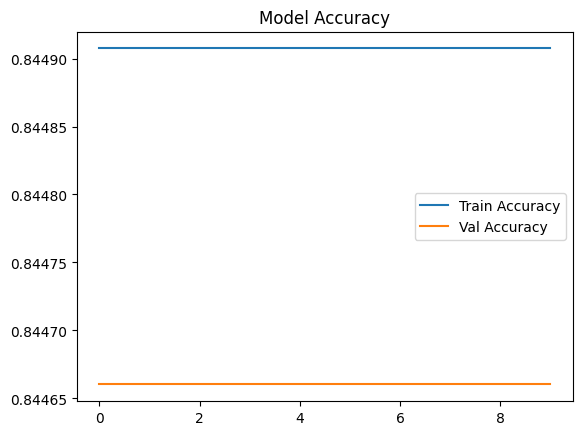

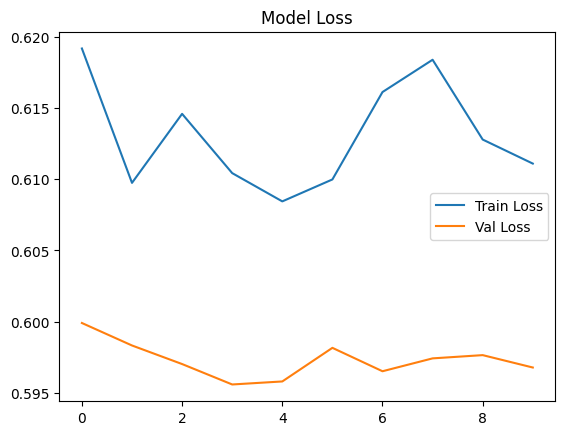

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode=None,
    shuffle=False
)

preds = model.predict(test_gen)
predicted_classes = preds.argmax(axis=1)
print(predicted_classes[:10])


Found 129 images belonging to 1 classes.


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "efficientnetb4" is incompatible with the layer: expected shape=(None, 380, 380, 3), found shape=(16, 224, 224, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(16, 224, 224, 3), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=train_dir,
    x_col='id_code',
    y_col='diagnosis',
    target_size=(380, 380),   # ✅ changed to match EfficientNetB4
    batch_size=16,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=val_dir,
    x_col='id_code',
    y_col='diagnosis',
    target_size=(380, 380),   # ✅ changed here too
    batch_size=16,
    class_mode='categorical'
)


Found 967 validated image filenames belonging to 5 classes.
Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1963 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 366 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


NameError: name 'EfficientNetB0' is not defined

In [ ]:
from tensorflow.keras.applications import EfficientNetB0


In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=train_dir,
    x_col='id_code',
    y_col='diagnosis',
    target_size=(380, 380),   # ✅ fix for EfficientNetB4
    batch_size=16,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=val_dir,
    x_col='id_code',
    y_col='diagnosis',
    target_size=(380, 380),   # ✅ same here
    batch_size=16,
    class_mode='categorical'
)


Found 967 validated image filenames belonging to 5 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1963 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 366 invalid image filename(s) in x_col="id_code". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
train_csv = BASE / 'train.csv'


In [ ]:
train_csv = BASE / 'trainLabels.csv'


In [ ]:
df = pd.read_csv(train_csv)
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/retinalnewproject/datasets/APTOS/trainLabels.csv'

In [ ]:
import os

# List files in the Messidor2 dataset directory
messidor2_dir = "/content/drive/MyDrive/retinalnewproject/datasets/Messidor2"
if os.path.exists(messidor2_dir):
    print(f"Contents of {messidor2_dir}:")
    print(os.listdir(messidor2_dir))
else:
    print(f"Directory not found: {messidor2_dir}")

Contents of /content/drive/MyDrive/retinalnewproject/datasets/Messidor2:
['messidor_data.csv', 'messidor-2']
